<a href="https://colab.research.google.com/github/cycyhoang/hoang-huong-chi-041204/blob/main/DSS_HR_Planning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## **Problem:**

Organizations face difficulty in predicting employee attrition and identifying underlying factors contributing to voluntary resignations. Without accurate insights into who is likely to leave and why, HR departments are unable to take preventive actions. This not only increases the burden of continuous recruitment but also disrupts team performance, affects morale, and imposes high replacement costs.
------
## Business questions to brainstorm:
---
> 1. What factors are contributing more to employee attrition?
> 1. What type of measures should the company take in order to retain their employees?
> 1. What business value does the model bring?
> 1. Will the model save lots of money?
> 1. Which business unit faces the attrition problem?

## **Step 1 | Import Libraries**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

pd.set_option("display.float_format", "{:.2f}".format)
pd.set_option("display.max_columns", 80)
pd.set_option("display.max_rows", 80)

## **Step 2 | Read Dataset**

In [ ]:
df = pd.read_csv("hr_planning.csv")
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  \
0                  1                        2  Female          94   
1                  2                        3    Male          61   
2                  4                        4    Male          92   
3                  5                        4  Female          56   
4                  7                        1    Male          40   
...              ...                      ...     ...         ...   
1465            2061                        3    Male          41   
1466            2062                        4    Male          42   
1467            2064                        2    Male          87   
1468            2065                        4    Male          63   
1469            2068                        2    Male          82   

      JobInvolvement  JobLevel                    JobRole  JobSatisfaction  \
0                  3         2            Sales Executive                4   
1                  2         2         Research Scientist                2   
2                  2         1      Laboratory Technician                3   
3                  3         1         Research Scientist                3   
4                  3         1      Laboratory Technician                2   
...              ...       ...                        ...              ...   
1465               4         2      Laboratory Technician                4   
1466               2         3  Healthcare Representative                1   
1467               4         2     Manufacturing Director                2   
1468               2         2            Sales Executive                2   
1469               4         2      Laboratory Technician                3   

     MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18  \
0           Single           5993        19479                   8      Y   
1          Married           5130        24907                   1      Y   
2           Single           2090         2396                   6      Y   
3          Married           2909        23159                   1      Y   
4          Married           3468        16632                   9      Y   
...            ...            ...          ...  

### **Dataset Description**

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Đọc ảnh
image_path1 = '/content/datadescrip-1.png'
image_path2 = '/content/datadescrip-2.png'
img1 = mpimg.imread(image_path1)
img2 = mpimg.imread(image_path2)

# Tạo subplot để hiển thị hai ảnh cạnh nhau
fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # 1 hàng, 2 cột

ax[0].imshow(img1)
ax[0].axis('off')  # Ẩn trục
ax[0].set_title("Image 1")  # Thêm tiêu đề

ax[1].imshow(img2)
ax[1].axis('off')
ax[1].set_title("Image 2")

plt.tight_layout()  # Giữ bố cục đẹp
plt.show()


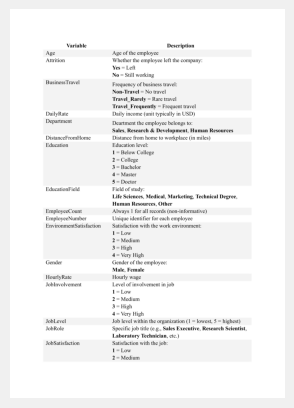

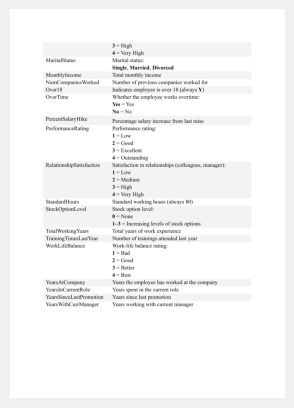

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to your image file
image_path1 = '/content/datadescrip-1.png'
image_path2 = '/content/datadescrip-2.png'
# Read the image
img = mpimg.imread(image_path1)
img2 = mpimg.imread(image_path2)

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()
plt.imshow(img2)
plt.axis('off')  # Hide axes
plt.show()


## **Step 3 | Dataset Overview**


### **Step 3.1 | Dataset Basic Information**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df.describe()

Age  DailyRate  DistanceFromHome  Education  EmployeeCount  \
count 1470.00    1470.00           1470.00    1470.00        1470.00   
mean    36.92     802.49              9.19       2.91           1.00   
std      9.14     403.51              8.11       1.02           0.00   
min     18.00     102.00              1.00       1.00           1.00   
25%     30.00     465.00              2.00       2.00           1.00   
50%     36.00     802.00              7.00       3.00           1.00   
75%     43.00    1157.00             14.00       4.00           1.00   
max     60.00    1499.00             29.00       5.00           1.00   

       EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
count         1470.00                  1470.00     1470.00         1470.00   
mean          1024.87                     2.72       65.89            2.73   
std            602.02                     1.09       20.33            0.71   
min              1.00                     1.00       30.00            1.00   
25%            491.25                     2.00       48.00            2.00   
50%           1020.50                     3.00       66.00            3.00   
75%           1555.75                     4.00       83.75            3.00   
max           2068.00                     4.00      100.00            4.00   

       JobLevel  JobSatisfaction  MonthlyIncome  MonthlyRate  \
count   1470.00          1470.00        1470.00      1470.00   
mean       2.06             2.73        6502.93     14313.10   
std        1.11             1.10        4707.96      7117.79   
min        1.00             1.00        1009.00      2094.00   
25%        1.00             2.00        2911.00      8047.00   
50%        2.00             3.00        4919.00     14235.50   
75%        3.00             4.00        8379.00     20461.50   
max        5.00             4.00       19999.00     26999.00   

       NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
count             1470.00            1470.00            1470.00   
mean                 2.69              15.21               3.15   
std                  2.50               3.66               0.36   
min                  0.00              11.00               3.00   
25%                  1.00              12.00               3.00   
50%                  2.00              14.00               3.00   
75%                  4.00              18.00               3.00   
max                  9.00              25.00               4.00   

       RelationshipSatisfaction  StandardHours  StockOptionLevel  \
count                   1470.00        1470.00           1470.00   
mean                       2.71          80.00              0.79   
std                        1.08           0.00              0.85   
min                        1.00          80.00              0.00   
25%                        2.00          80.00              0.00   
50%                        3.00          80.00              1.00   
75%                        4.00          80.00              1.00   
max                        4.00          80.00              3.00   

       TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
count            1470.00                1470.00          1470.00   
mean               11.28                   2.80             2.76   
std                 7.78                   1.29             0.71   
min                 0.00                   0.00             1.00   
25%                 6.00                   2.00             2.00   
50%                10.00                   3.00             3.00   
75%                15.00                   3.00             3.00   
max                40.00                   6.00             4.00   

       YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
count         1470.00             1470.00                  1470.00   
mean             7.01                4.23                     2.19   
std              6.13                3.62

In [ ]:
import pandas as pd

summary_df = pd.DataFrame({
    "Column": df.columns,
    "Unique Values Count": [df[col].nunique() for col in df.columns]
})

print(summary_df)

                      Column  Unique Values Count
0                        Age                   43
1                  Attrition                    2
2             BusinessTravel                    3
3                  DailyRate                  886
4                 Department                    3
5           DistanceFromHome                   29
6                  Education                    5
7             EducationField                    6
8              EmployeeCount                    1
9             EmployeeNumber                 1470
10   EnvironmentSatisfaction                    4
11                    Gender                    2
12                HourlyRate                   71
13            JobInvolvement                    4
14                  JobLevel                    5
15                   JobRole                    9
16           JobSatisfaction                    4
17             MaritalStatus                    3
18             MonthlyIncome                 1349


**Note:** We notice that '`EmployeeCount`', '`Over18`', '`StandardHours`' have only one unique values and '`EmployeeNumber`' has `1470` unique values.
This features aren't useful for us, So we are going to drop those columns.

In [ ]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

### **Step 3.2 | Summary Statistics for Categorical Variables**

In [ ]:
# Get the summary statistics for categorical variables
df.describe(include='object')

Attrition BusinessTravel              Department EducationField Gender  \
count       1470           1470                    1470           1470   1470   
unique         2              3                       3              6      2   
top           No  Travel_Rarely  Research & Development  Life Sciences   Male   
freq        1233           1043                     961            606    882   

                JobRole MaritalStatus OverTime  
count              1470          1470     1470  
unique                9             3        2  
top     Sales Executive       Married       No  
freq                326           673     1054

In [ ]:
object_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 30:
        object_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print(df[column].value_counts())
        print("-" * 50)


BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
--------------------------------------------------
Department : ['Sales' 'Research & Development' 'Human Resources']
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
--------------------------------------------------
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
--------------------------------------------------
Gender : ['Female' 'Male']
Gender
Male      882
Female    588
Name: count, dtype: int64
--------------------------------------------------
JobRole : ['Sales Executive' 'Research S

In [ ]:
len(object_col)

7

In [ ]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df["Attrition"] = label.fit_transform(df.Attrition)

### **Step 3.3 | Summary Statistics for Numerical Variables**


In [ ]:
df.describe().T

count     mean     std     min     25%      50%  \
Age                      1470.00    36.92    9.14   18.00   30.00    36.00   
DailyRate                1470.00   802.49  403.51  102.00  465.00   802.00   
DistanceFromHome         1470.00     9.19    8.11    1.00    2.00     7.00   
Education                1470.00     2.91    1.02    1.00    2.00     3.00   
EnvironmentSatisfaction  1470.00     2.72    1.09    1.00    2.00     3.00   
HourlyRate               1470.00    65.89   20.33   30.00   48.00    66.00   
JobInvolvement           1470.00     2.73    0.71    1.00    2.00     3.00   
JobLevel                 1470.00     2.06    1.11    1.00    1.00     2.00   
JobSatisfaction          1470.00     2.73    1.10    1.00    2.00     3.00   
MonthlyIncome            1470.00  6502.93 4707.96 1009.00 2911.00  4919.00   
MonthlyRate              1470.00 14313.10 7117.79 2094.00 8047.00 14235.50   
NumCompaniesWorked       1470.00     2.69    2.50    0.00    1.00     2.00   
PercentSalaryHike        1470.00    15.21    3.66   11.00   12.00    14.00   
PerformanceRating        1470.00     3.15    0.36    3.00    3.00     3.00   
RelationshipSatisfaction 1470.00     2.71    1.08    1.00    2.00     3.00   
StockOptionLevel         1470.00     0.79    0.85    0.00    0.00     1.00   
TotalWorkingYears        1470.00    11.28    7.78    0.00    6.00    10.00   
TrainingTimesLastYear    1470.00     2.80    1.29    0.00    2.00     3.00   
WorkLifeBalance          1470.00     2.76    0.71    1.00    2.00     3.00   
YearsAtCompany           1470.00     7.01    6.13    0.00    3.00     5.00   
YearsInCurrentRole       1470.00     4.23    3.62    0.00    2.00     3.00   
YearsSinceLastPromotion  1470.00     2.19    3.22    0.00    0.00     1.00   
YearsWithCurrManager     1470.00     4.12    3.57    0.00    2.00     3.00   

                              75%      max  
Age                         43.00    60.00  
DailyRate                 1157.00  1499.00  
DistanceFromHome            14.00    29.00  
Education                    4.00     5.00  
EnvironmentSatisfaction      4.00     4.00  
HourlyRate                  83.75   100.00  
JobInvolvement               3.00     4.00  
JobLevel                     3.00     5.00  
JobSatisfaction              4.00     4.00  
MonthlyIncome             8379.00 19999.00  
MonthlyRate              20461.50 26999.00  
NumCompaniesWorked           4.00     9.00  
PercentSalaryHike           18.00    25.00  
PerformanceRating            3.00     4.00  
RelationshipSatisfaction     4.00     4.00  
StockOptionLevel             1.00     3.00  
TotalWorkingYears           15.00    40.00  
TrainingTimesLastYear        3.00     6.00  
WorkLifeBalance              3.00     4.00  
YearsAtCompany               9.00    40.00  
YearsInCurrentRole           7.00    18.00  
YearsSinceLastPromotion      3.00    15.00  
YearsWithCurrManager         7.00    17.00

In [ ]:
disc_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() < 30:
        print(f"{column} : {df[column].unique()}")
        disc_col.append(column)
        print("-" * 50)
if 'Attrition' in disc_col:
    disc_col.remove('Attrition')


Attrition : [1 0]
--------------------------------------------------
DistanceFromHome : [ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13]
--------------------------------------------------
Education : [2 1 4 3 5]
--------------------------------------------------
EnvironmentSatisfaction : [2 3 4 1]
--------------------------------------------------
JobInvolvement : [3 2 4 1]
--------------------------------------------------
JobLevel : [2 1 3 4 5]
--------------------------------------------------
JobSatisfaction : [4 2 3 1]
--------------------------------------------------
NumCompaniesWorked : [8 1 6 9 0 4 5 2 7 3]
--------------------------------------------------
PercentSalaryHike : [11 23 15 12 13 20 22 21 17 14 16 18 19 24 25]
--------------------------------------------------
PerformanceRating : [3 4]
--------------------------------------------------
RelationshipSatisfaction : [1 4 2 3]
--------------------------------------------------
S

In [ ]:
cont_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() > 30:
        print(f"{column} : Minimum: {df[column].min()}, Maximum: {df[column].max()}")
        cont_col.append(column)
        print("-"*50)

Age : Minimum: 18, Maximum: 60
--------------------------------------------------
DailyRate : Minimum: 102, Maximum: 1499
--------------------------------------------------
HourlyRate : Minimum: 30, Maximum: 100
--------------------------------------------------
MonthlyIncome : Minimum: 1009, Maximum: 19999
--------------------------------------------------
MonthlyRate : Minimum: 2094, Maximum: 26999
--------------------------------------------------
TotalWorkingYears : Minimum: 0, Maximum: 40
--------------------------------------------------
YearsAtCompany : Minimum: 0, Maximum: 40
--------------------------------------------------


## **Step 4 | EDA**

- Find patterns in data through data visualization. Reveal hidden secrets of the data through graphs, analysis and charts.
    - Univariate analysis
        > - Continous variables : Histograms, boxplots. This gives us understanding about the central tendency and spread
        > - Categorical variable : Bar chart showing frequency in each category
    - Bivariate analysis
        > - Continous & Continous : Scatter plots to know how continous variables interact with each other
        > - Categorical & categorical : Stacked column chart to show how the frequencies are spread between two
        > - categorical variables
        > - Categorical & Continous : Boxplots, Swamplots or even bar charts
- Detect outliers
- Feature engineering

### **Data Visualisation**

In [ ]:
# Categorical columns
cat_cols = df.select_dtypes(include='object').columns

# Numerical columns
num_cols = df.select_dtypes(include='number').columns

cat_cols, num_cols

(Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
        'JobRole', 'MaritalStatus', 'OverTime'],
       dtype='object'),
 Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
        'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
        'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
        'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
        'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
        'YearsSinceLastPromotion', 'YearsWithCurrManager'],
       dtype='object'))

<ipython-input-8-1f2fc5f2ac46>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='viridis')


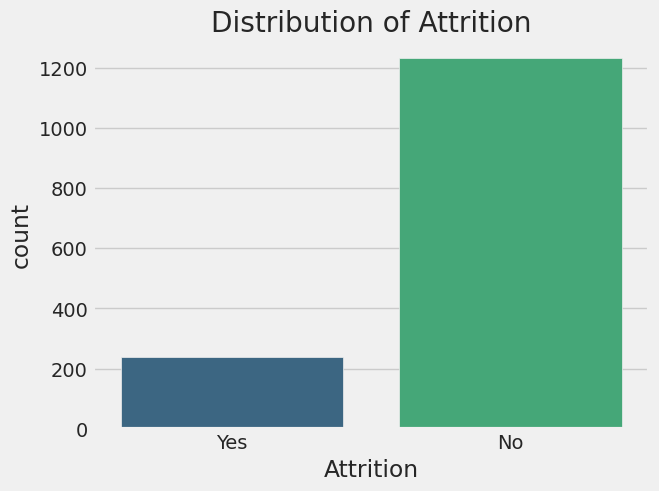

<ipython-input-8-1f2fc5f2ac46>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='viridis')


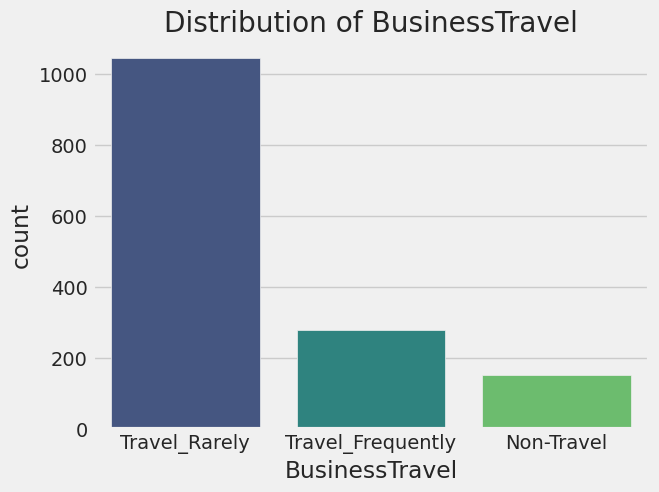

<ipython-input-8-1f2fc5f2ac46>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='viridis')


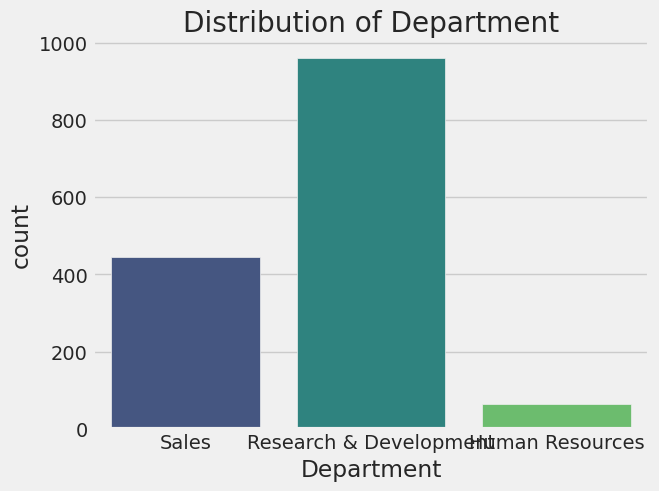

<ipython-input-8-1f2fc5f2ac46>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='viridis')


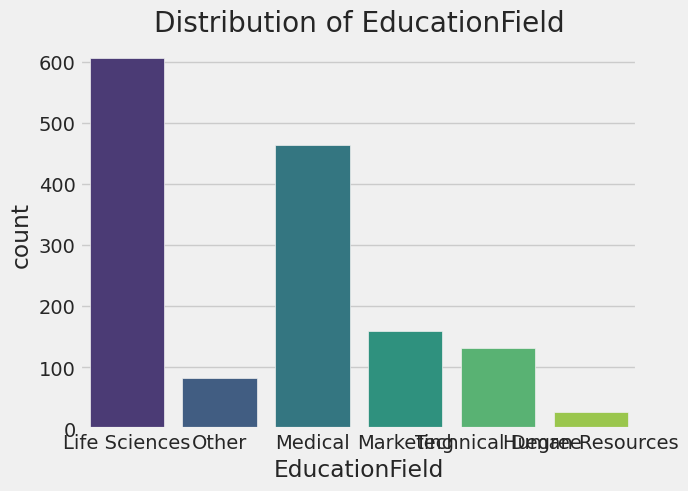

<ipython-input-8-1f2fc5f2ac46>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='viridis')


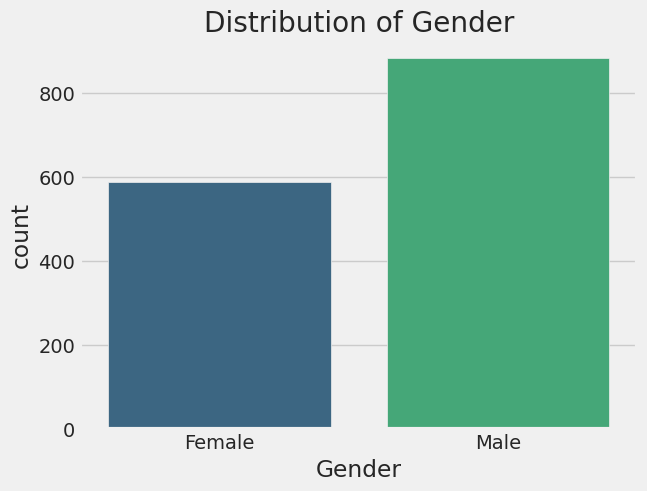

<ipython-input-8-1f2fc5f2ac46>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='viridis')


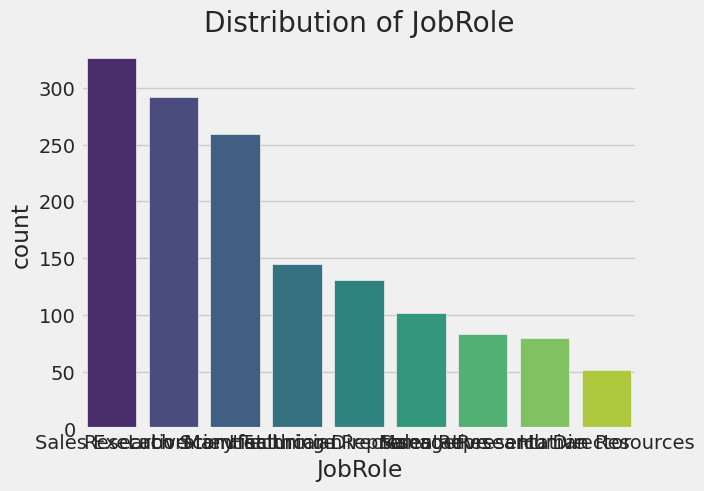

<ipython-input-8-1f2fc5f2ac46>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='viridis')


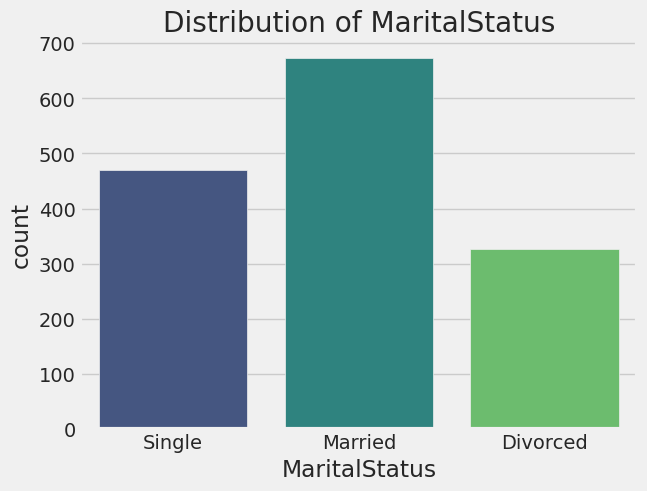

<ipython-input-8-1f2fc5f2ac46>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='viridis')


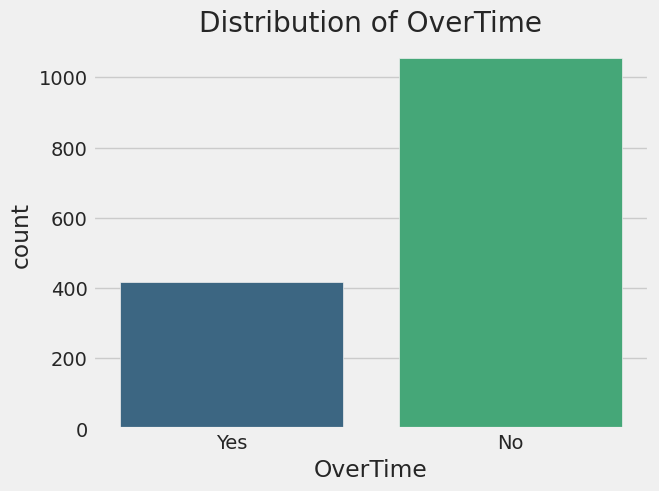

In [ ]:
# Chart of categorical features
for col in cat_cols:
    plt.figure()
    sns.countplot(x=df[col], palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.show()

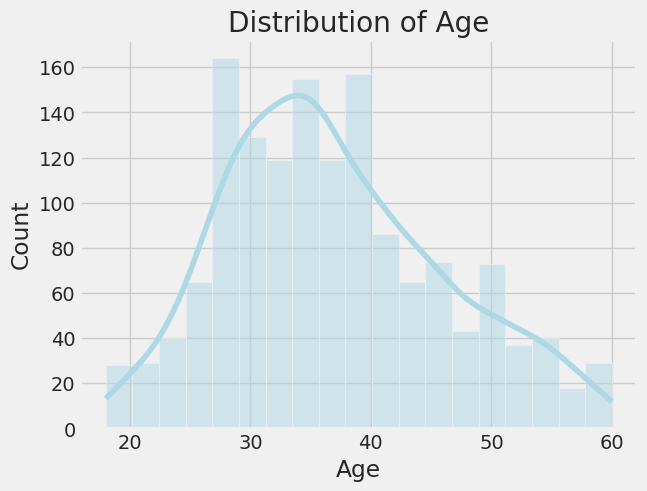

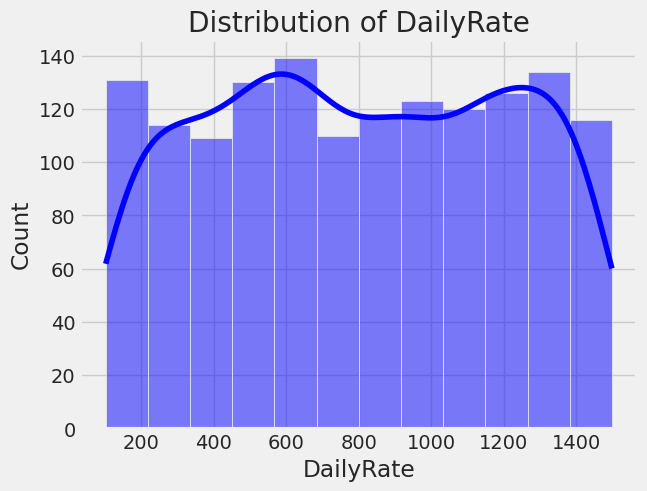

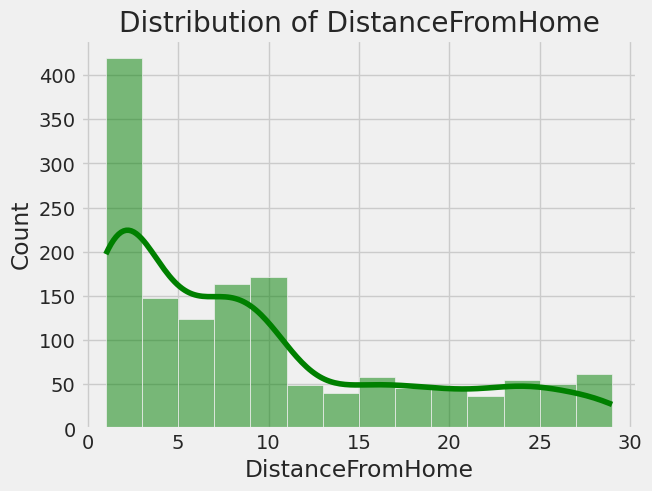

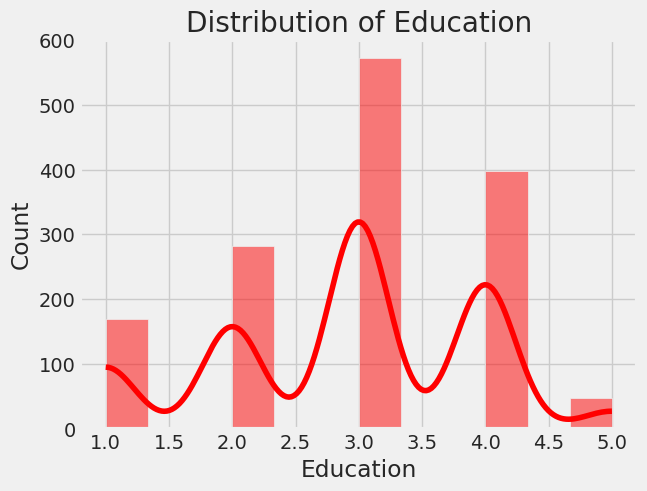

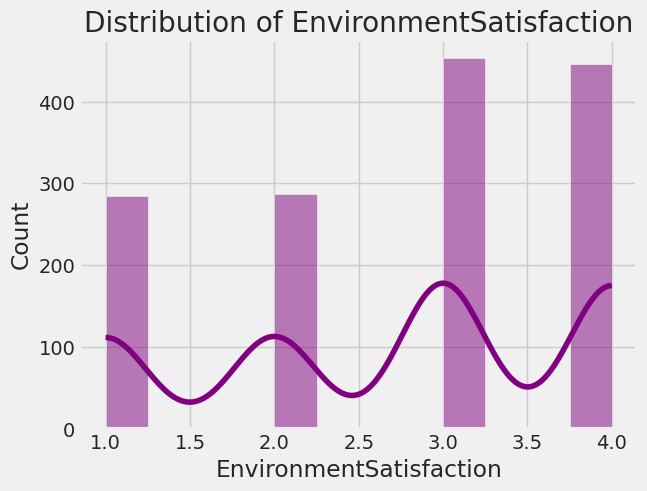

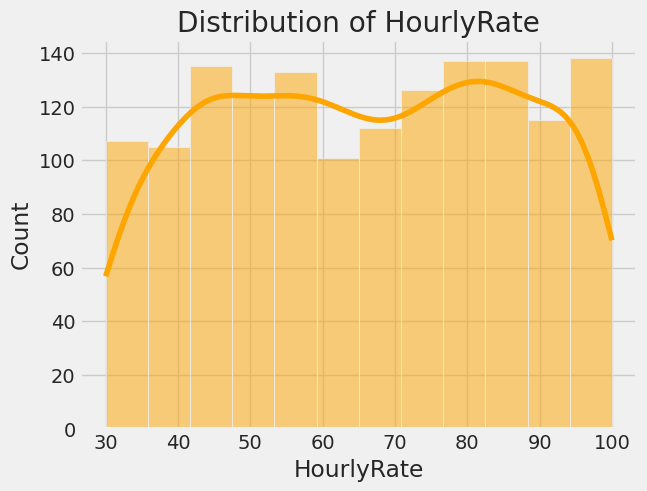

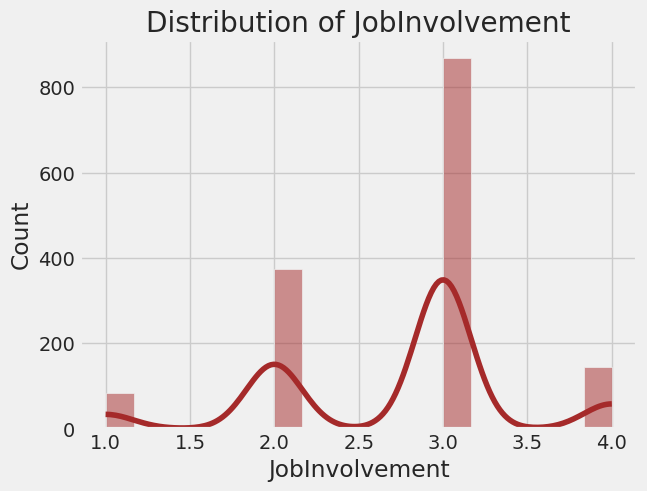

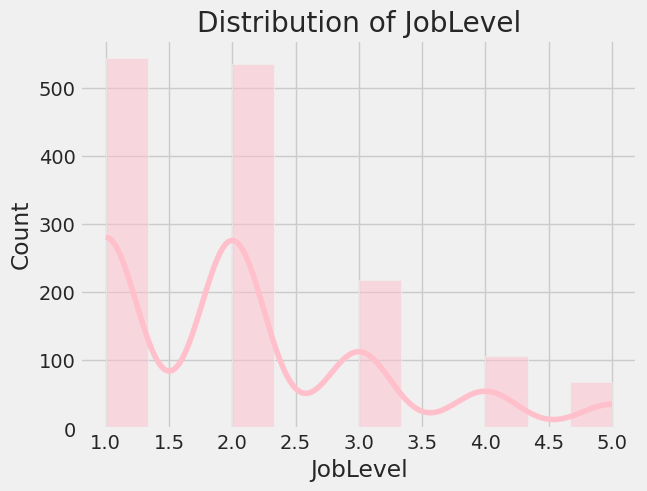

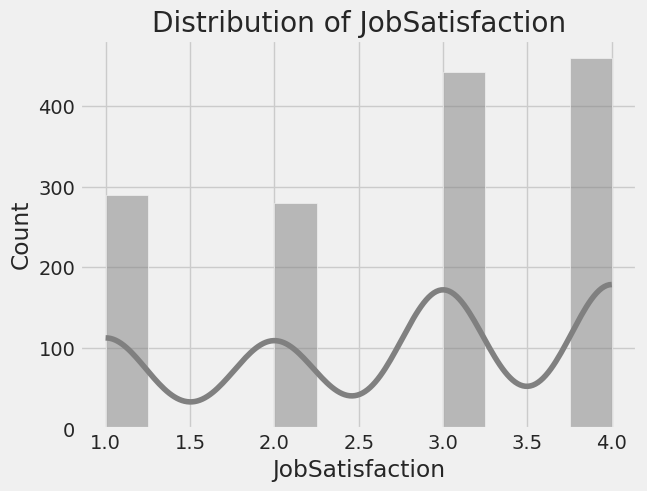

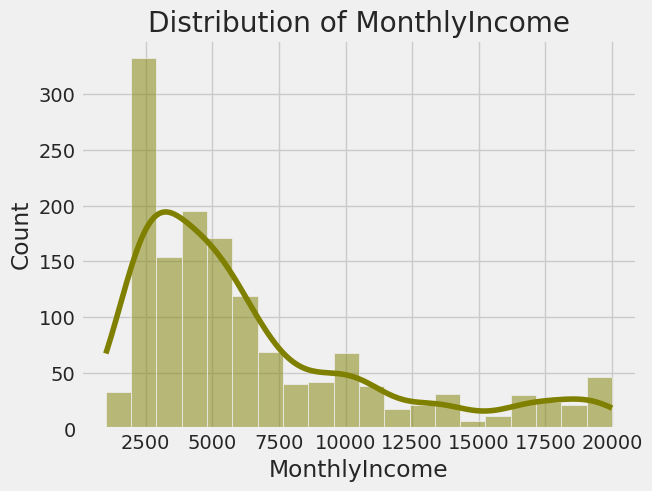

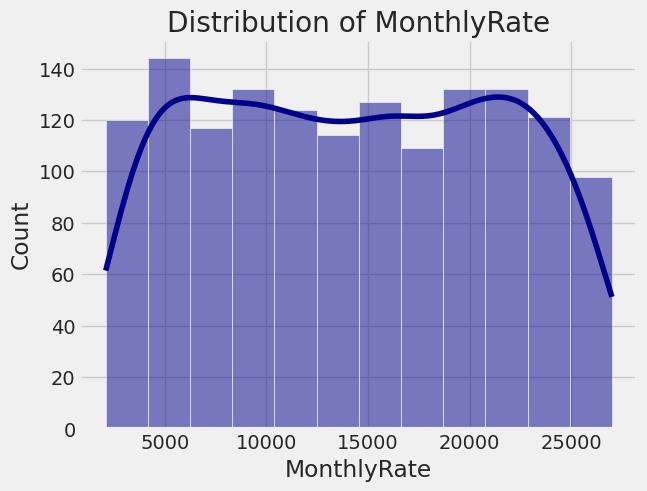

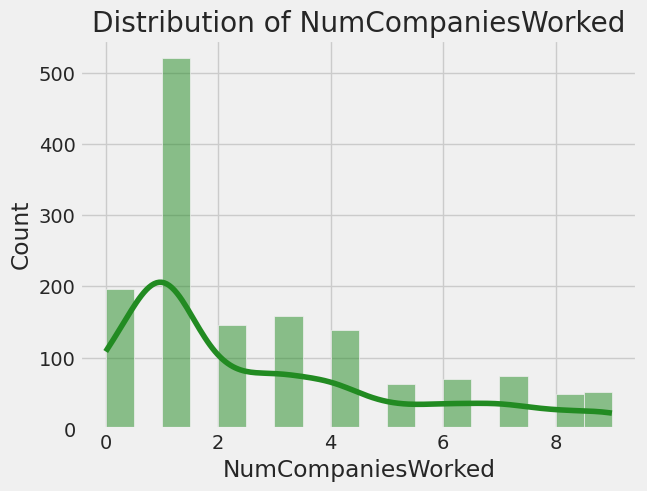

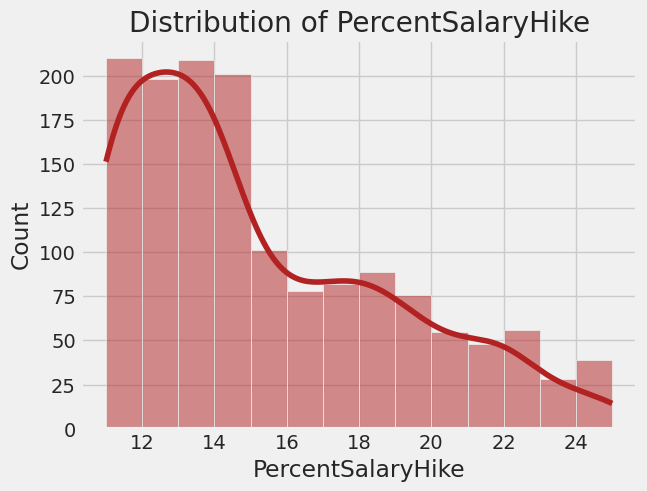

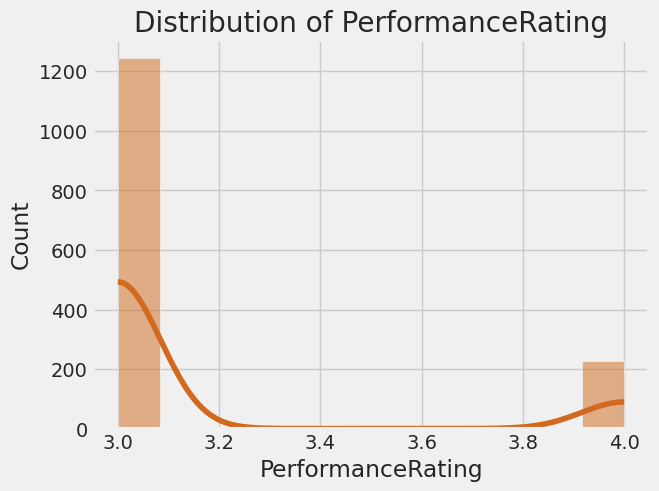

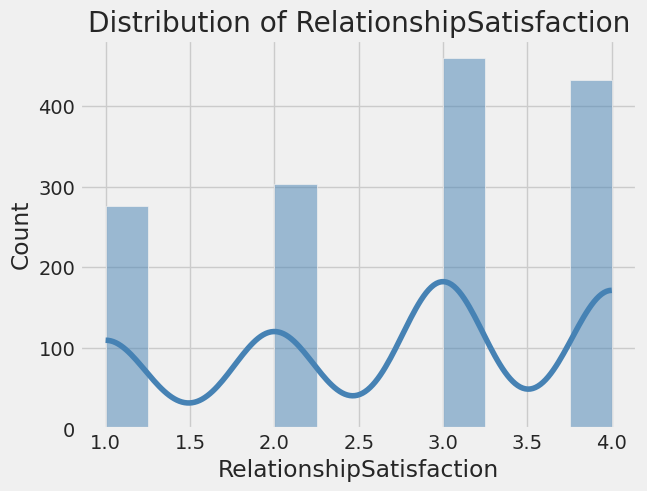

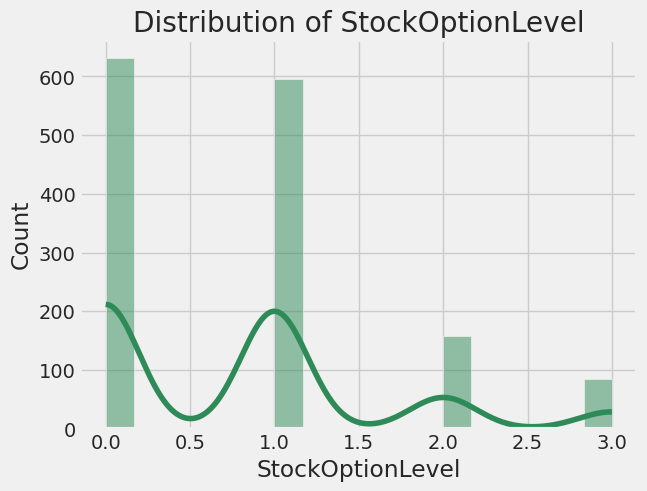

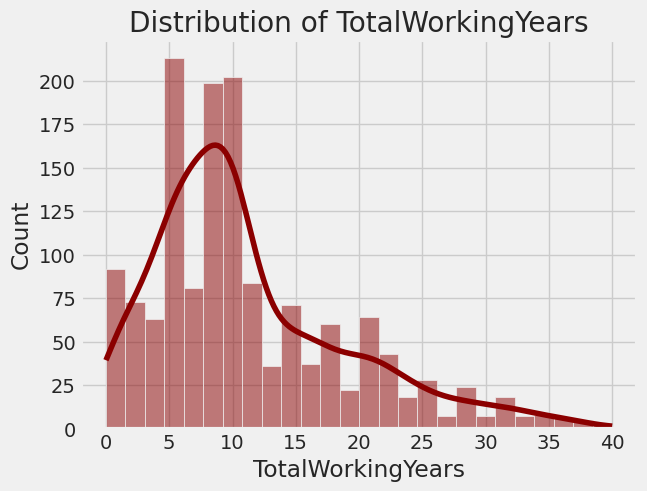

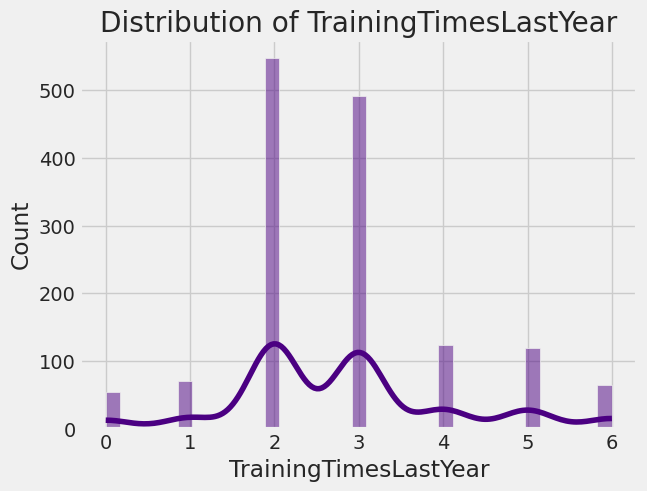

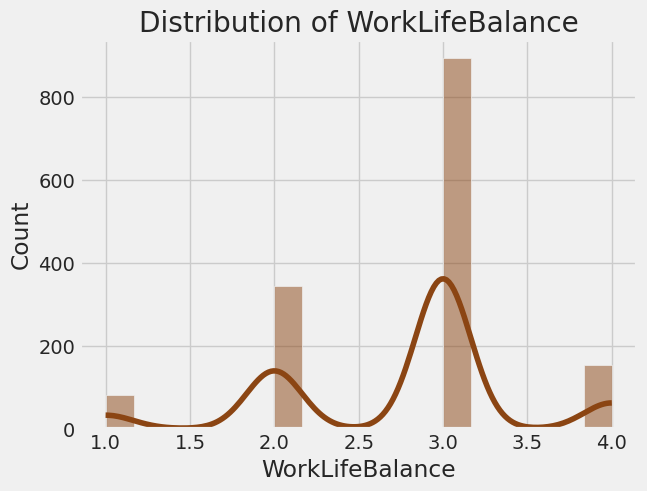

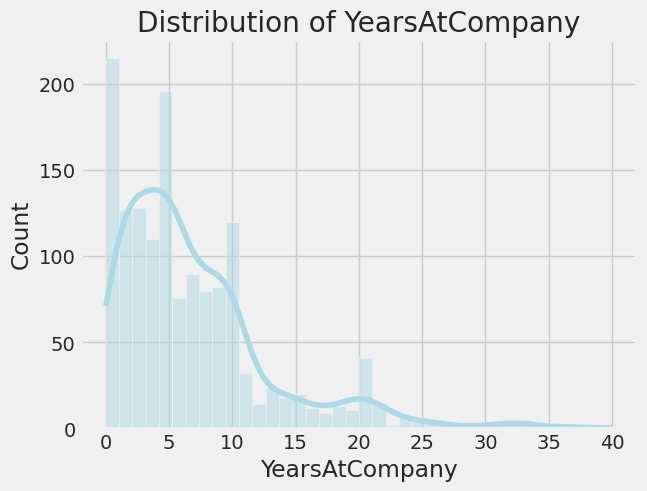

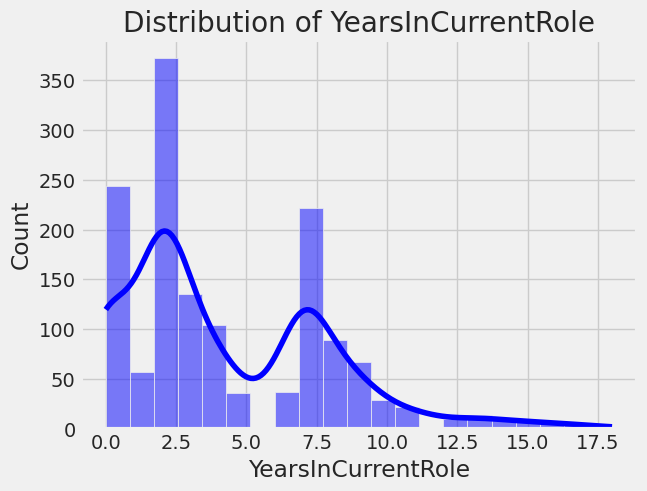

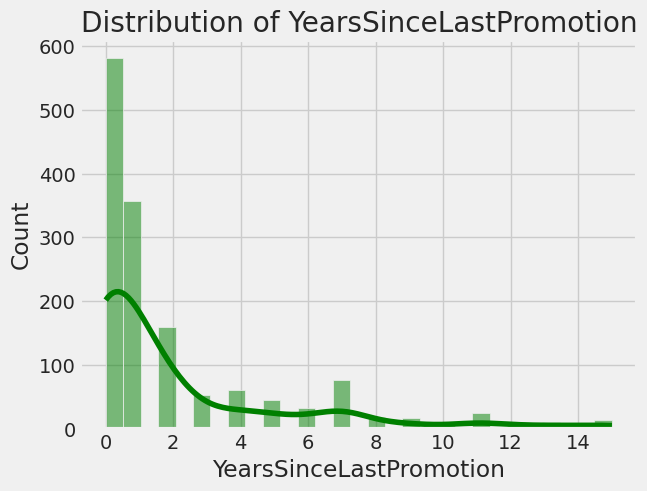

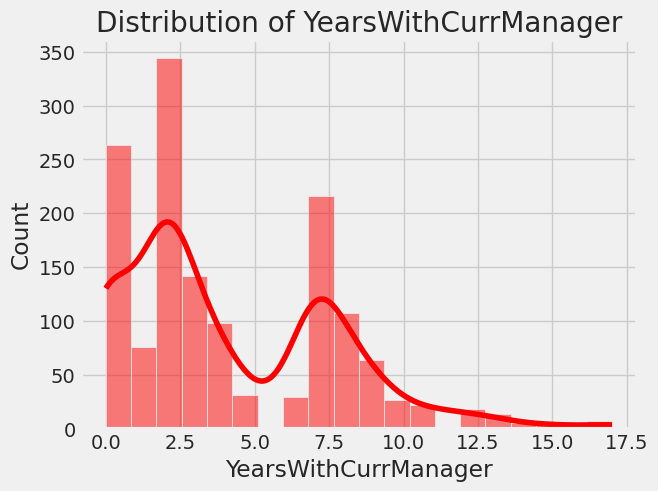

In [ ]:
# Distribution of numerical features
colors = ['lightblue', 'blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'darkblue', 'forestgreen', 'firebrick', 'chocolate', 'steelblue', 'seagreen', 'darkred', 'indigo', 'saddlebrown']

for i, col in enumerate(num_cols):
    plt.figure()
    sns.histplot(df[col], kde=True, color=colors[i % len(colors)])
    plt.title(f'Distribution of {col}')
    plt.show()

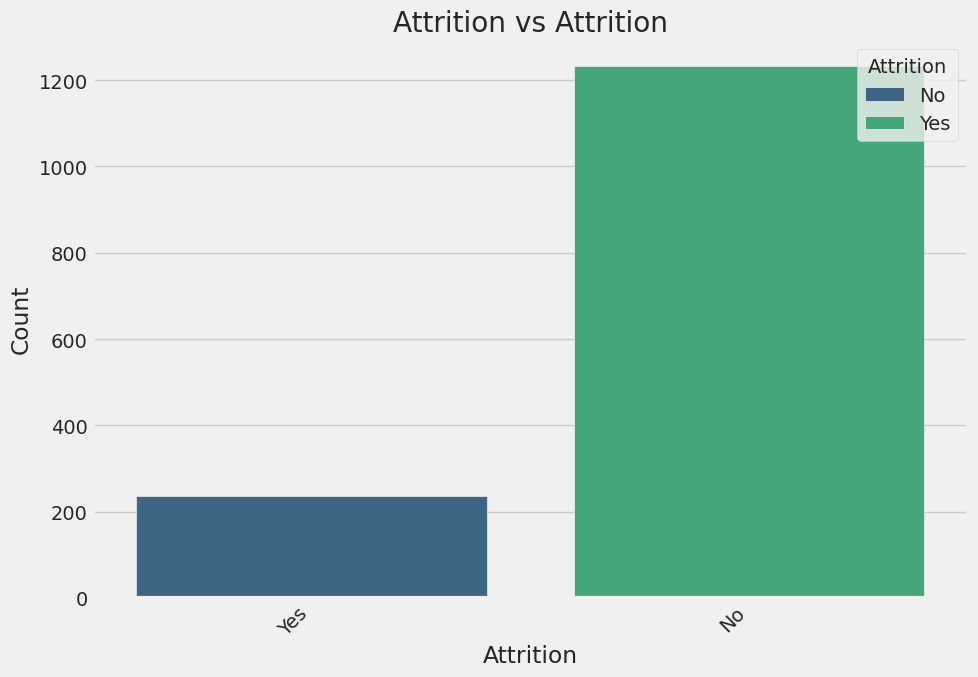

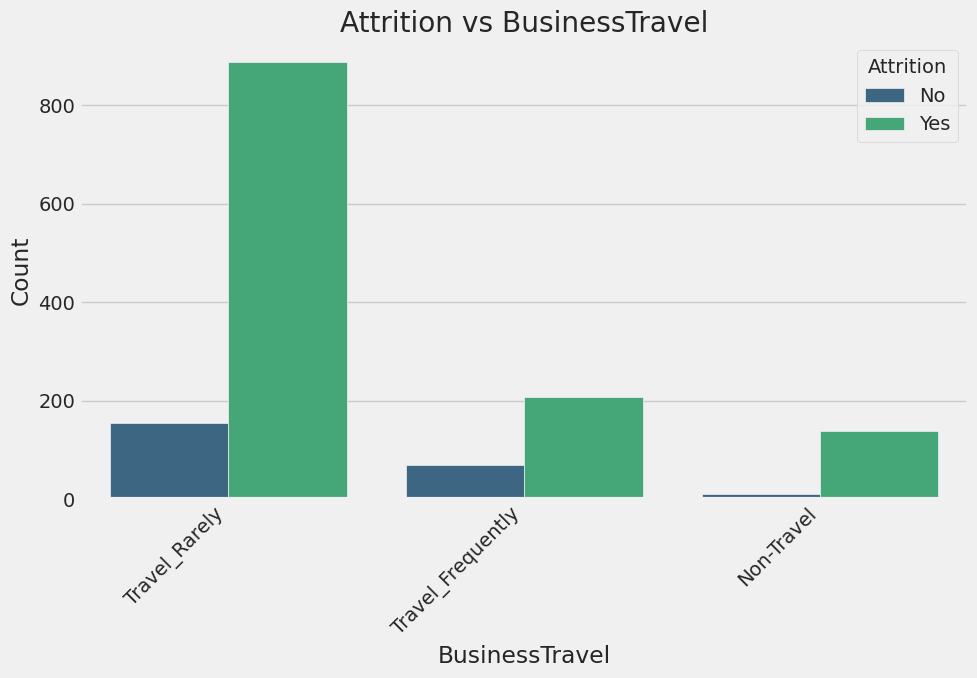

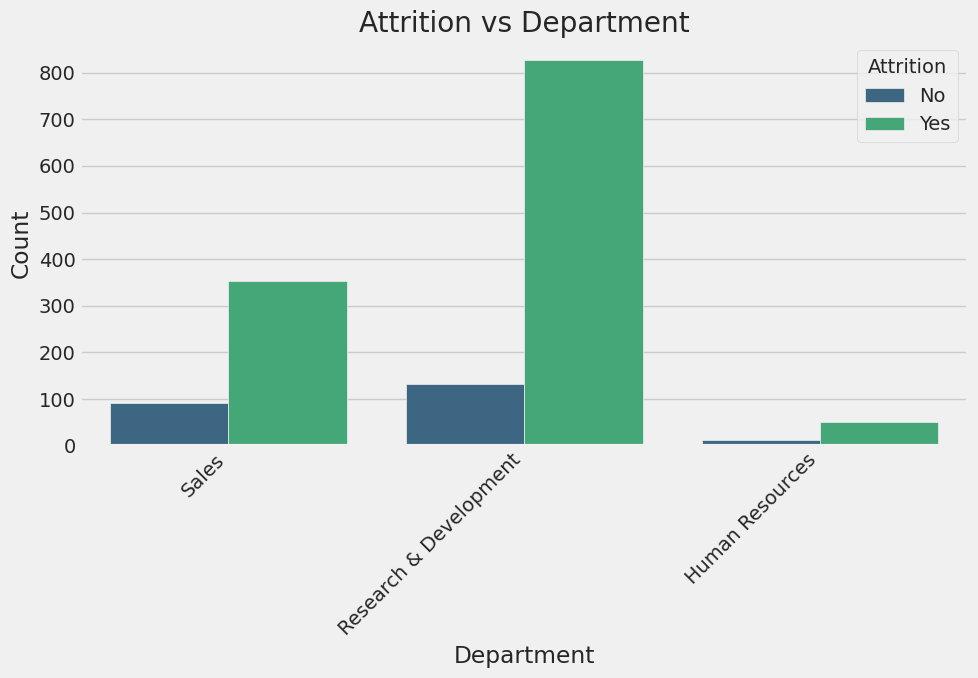

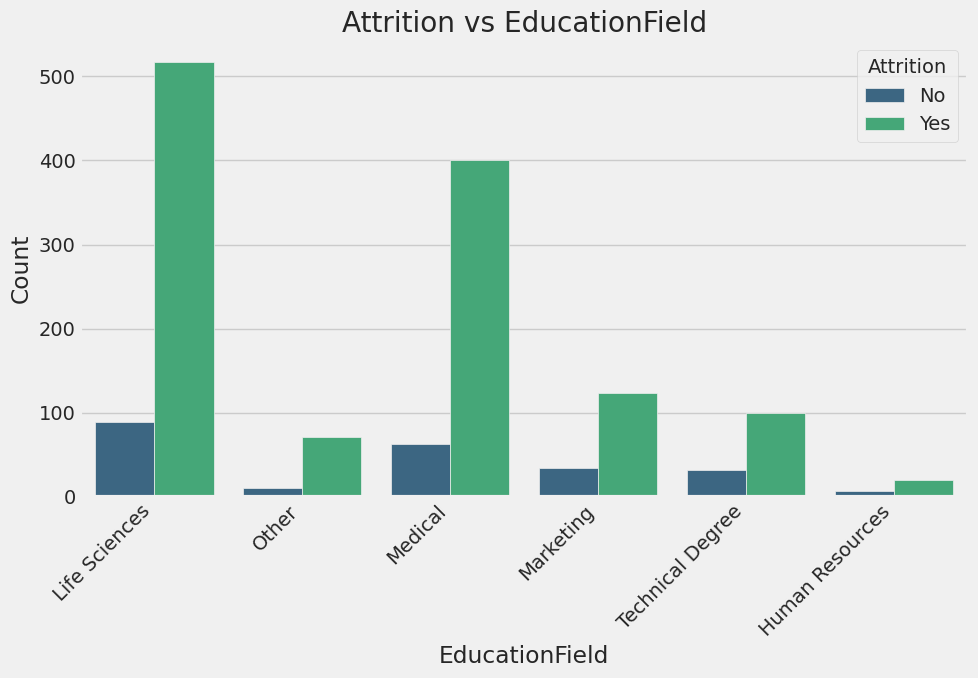

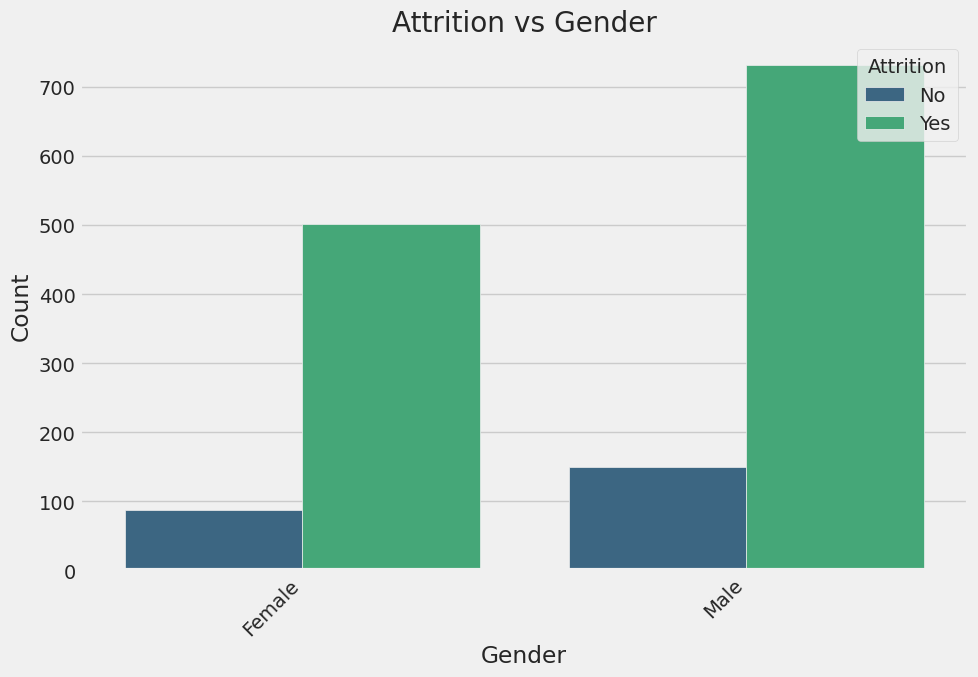

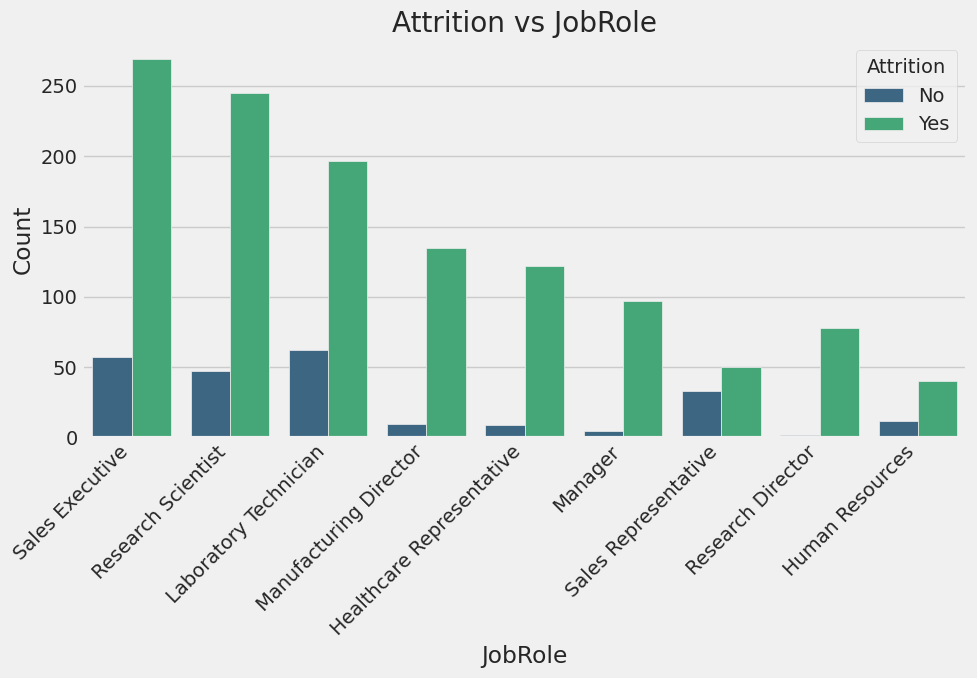

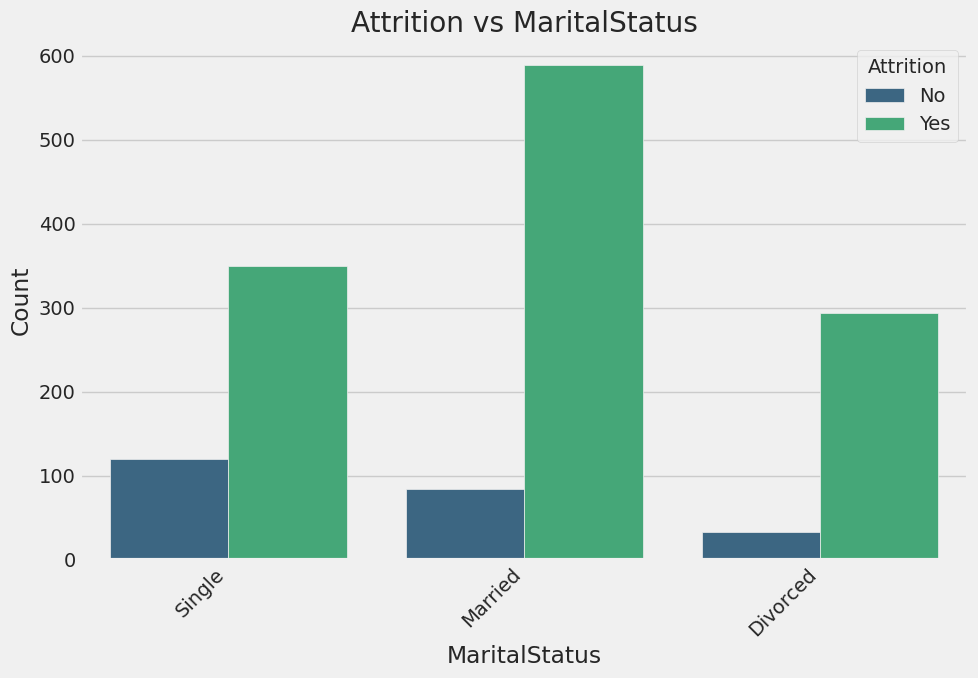

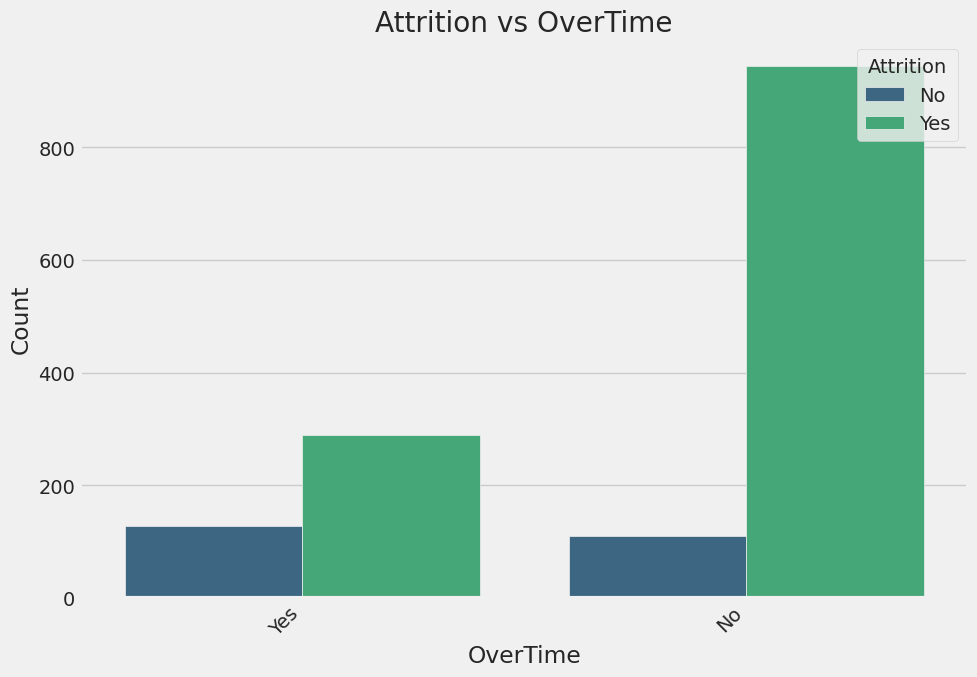

In [ ]:
categorical_cols_for_viz = df.select_dtypes(include='object').columns

# Visualize the relationship between Attrition and each other categorical feature
for col in categorical_cols_for_viz:
    plt.figure(figsize=(10, 7))
    sns.countplot(x=col, hue='Attrition', data=df, palette='viridis')
    plt.title(f'Attrition vs {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Attrition', loc='upper right', labels=['No', 'Yes'])
    plt.tight_layout()
    plt.show()

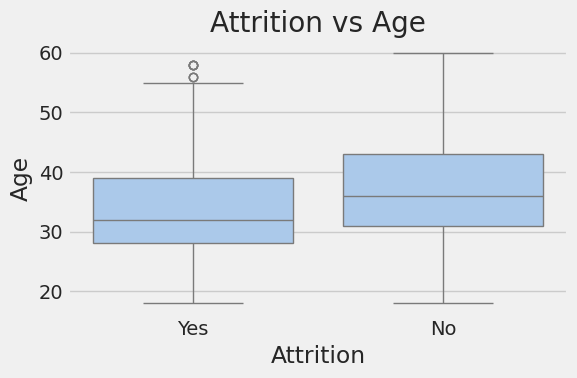

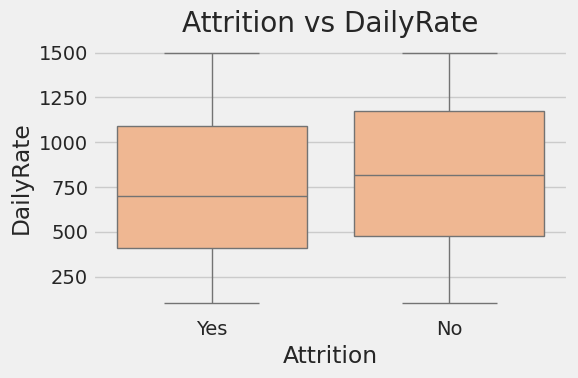

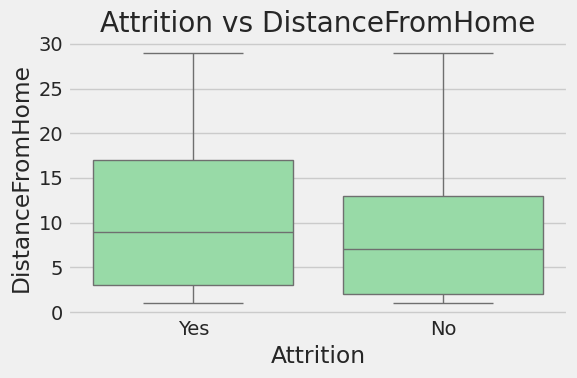

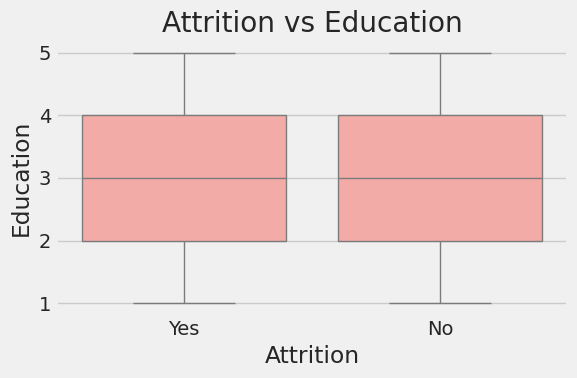

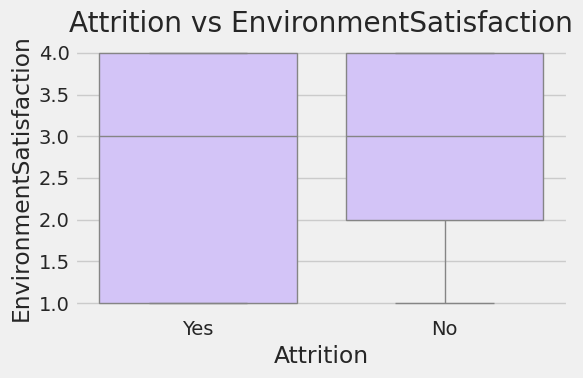

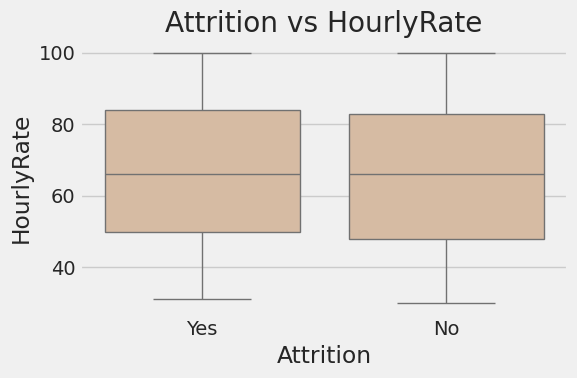

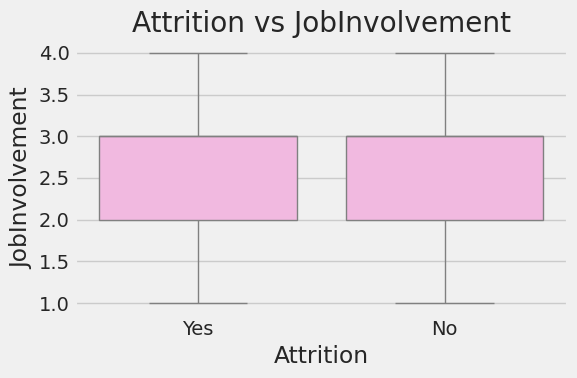

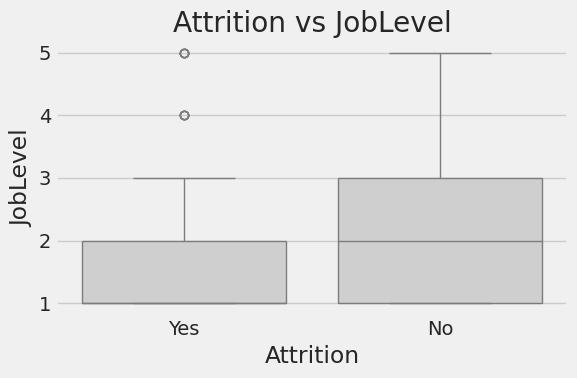

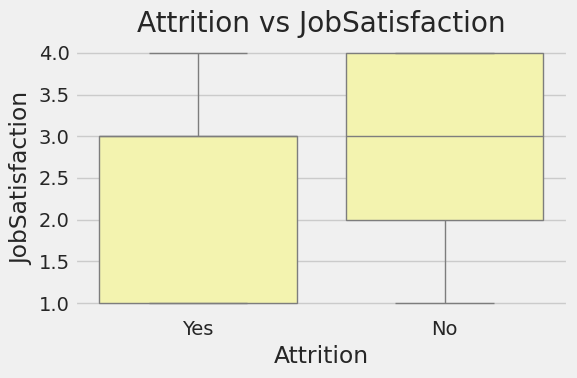

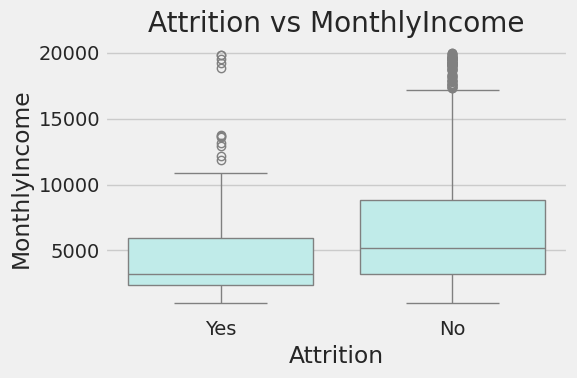

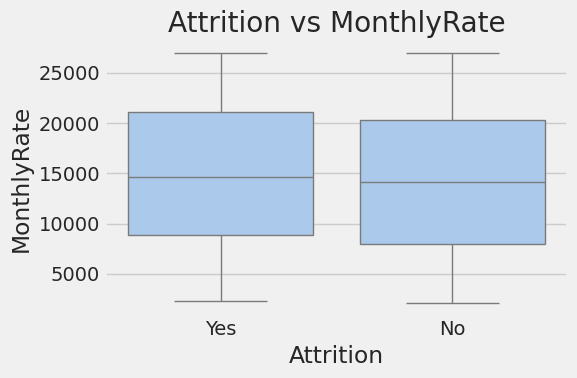

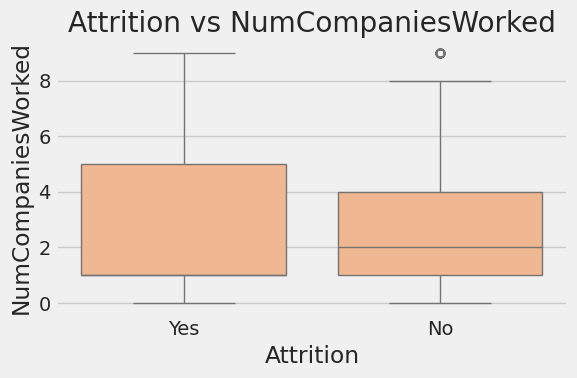

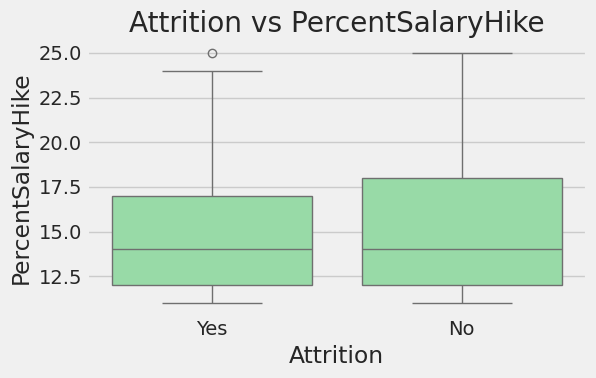

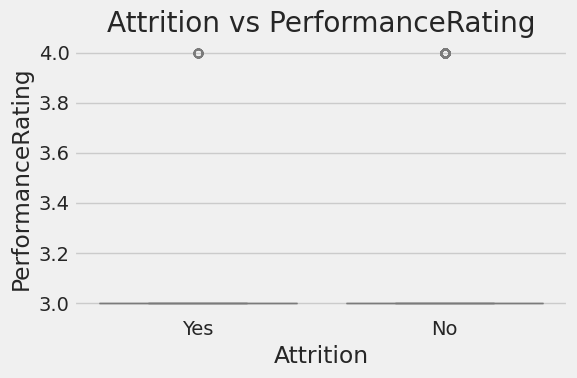

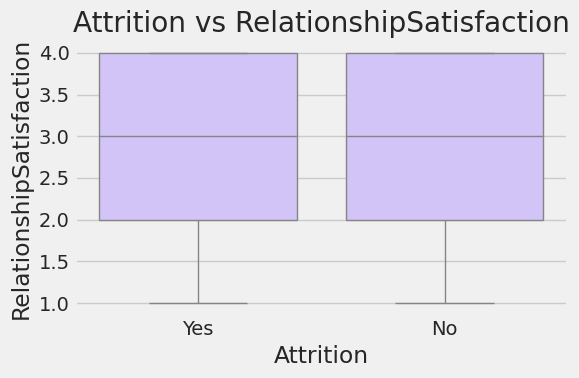

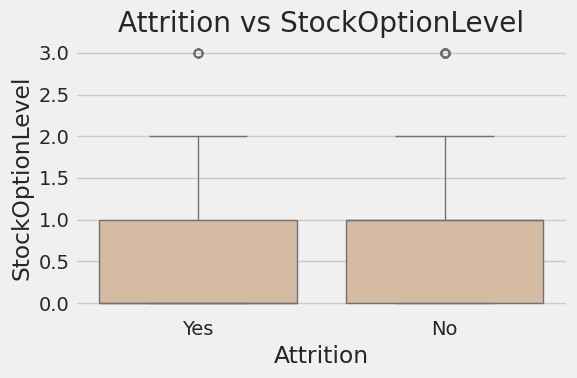

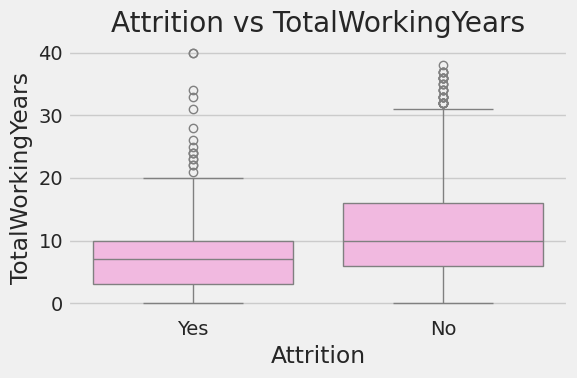

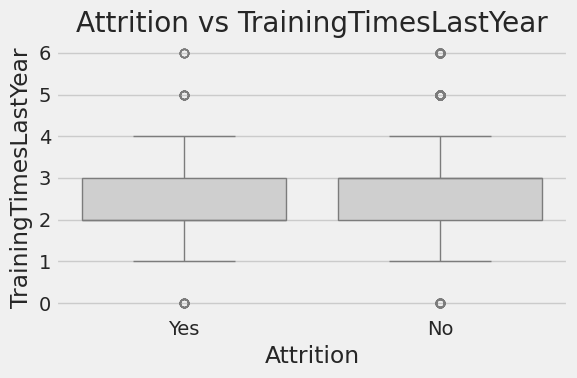

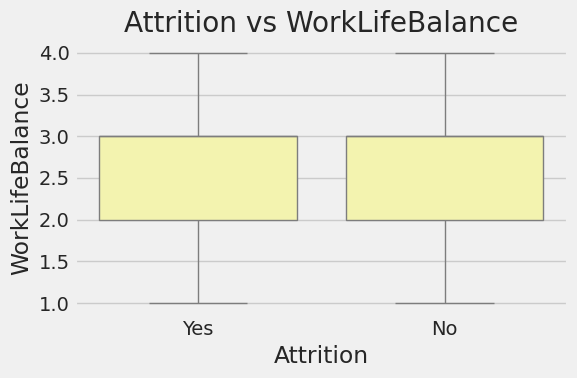

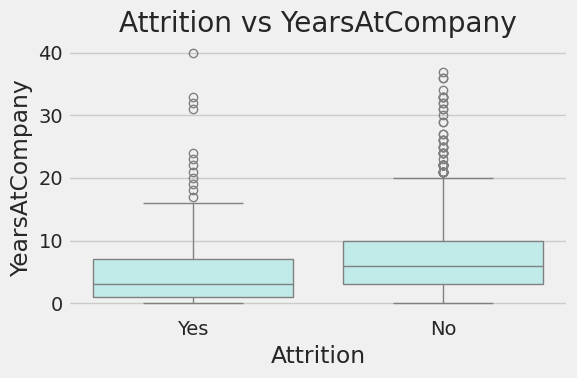

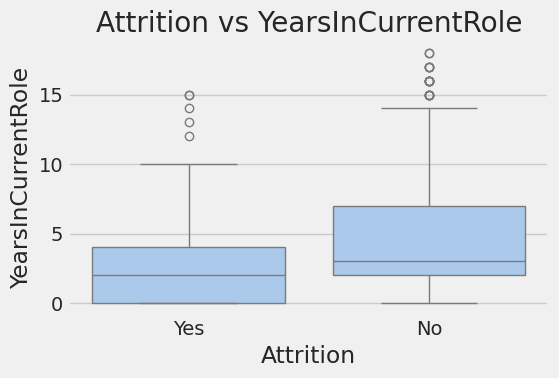

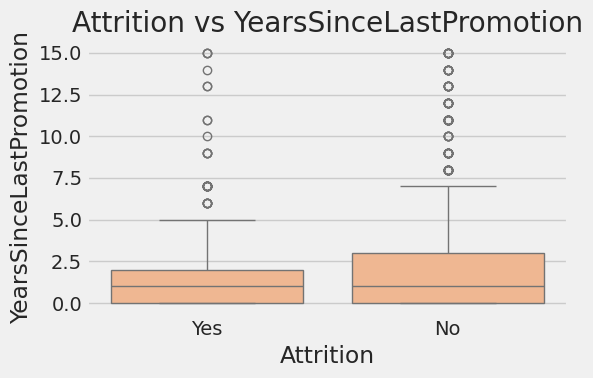

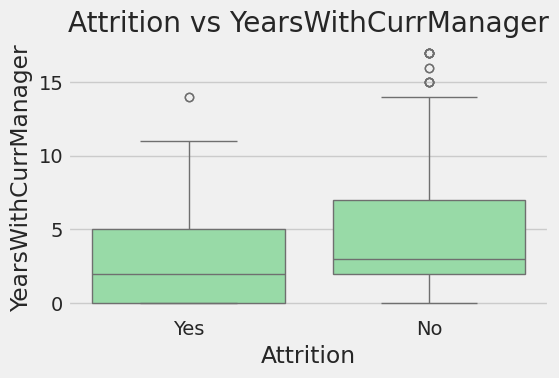

In [ ]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features = [col for col in numerical_features if col != 'Attrition']

# Visualize the correlation between Attrition and each other numerical feature
palette = sns.color_palette("pastel")
for i, col in enumerate(numerical_features):
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='Attrition', y=col, color=palette[i % len(palette)])
    plt.title(f'Attrition vs {col}')
    plt.tight_layout()
    plt.show()

### **Note**

It seems that `EnvironmentSatisfaction`, `JobSatisfaction`, `PerformanceRating`, and `RelationshipSatisfaction` features don't have big impact on the detrmination of `Attrition` of employees.

***

### **Conclusions**

***
- The workers with low `JobLevel`, `MonthlyIncome`, `YearAtCompany`, and `TotalWorkingYears` are more likely to quit there jobs.
- `BusinessTravel` : The workers who travel alot are more likely to quit then other employees.

- `Department` : The worker in `Research & Development` are more likely to stay then the workers on other departement.

- `EducationField` : The workers with `Human Resources` and `Technical Degree` are more likely to quit then employees from other fields of educations.

- `Gender` : The `Male` are more likely to quit.

- `JobRole` : The workers in `Laboratory Technician`, `Sales Representative`, and `Human Resources` are more likely to quit the workers in other positions.

- `MaritalStatus` : The workers who have `Single` marital status are more likely to quit the `Married`, and `Divorced`.

- `OverTime` : The workers who work more hours are likely to quit then others.


### **Correlation Matrix**

In [ ]:
numeric_df = df.select_dtypes(include=['number'])
print(numeric_df.isnull().sum())
numeric_df.dropna(inplace=True)


Age                         0
Attrition                   0
DailyRate                   0
DistanceFromHome            0
Education                   0
EnvironmentSatisfaction     0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobSatisfaction             0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64


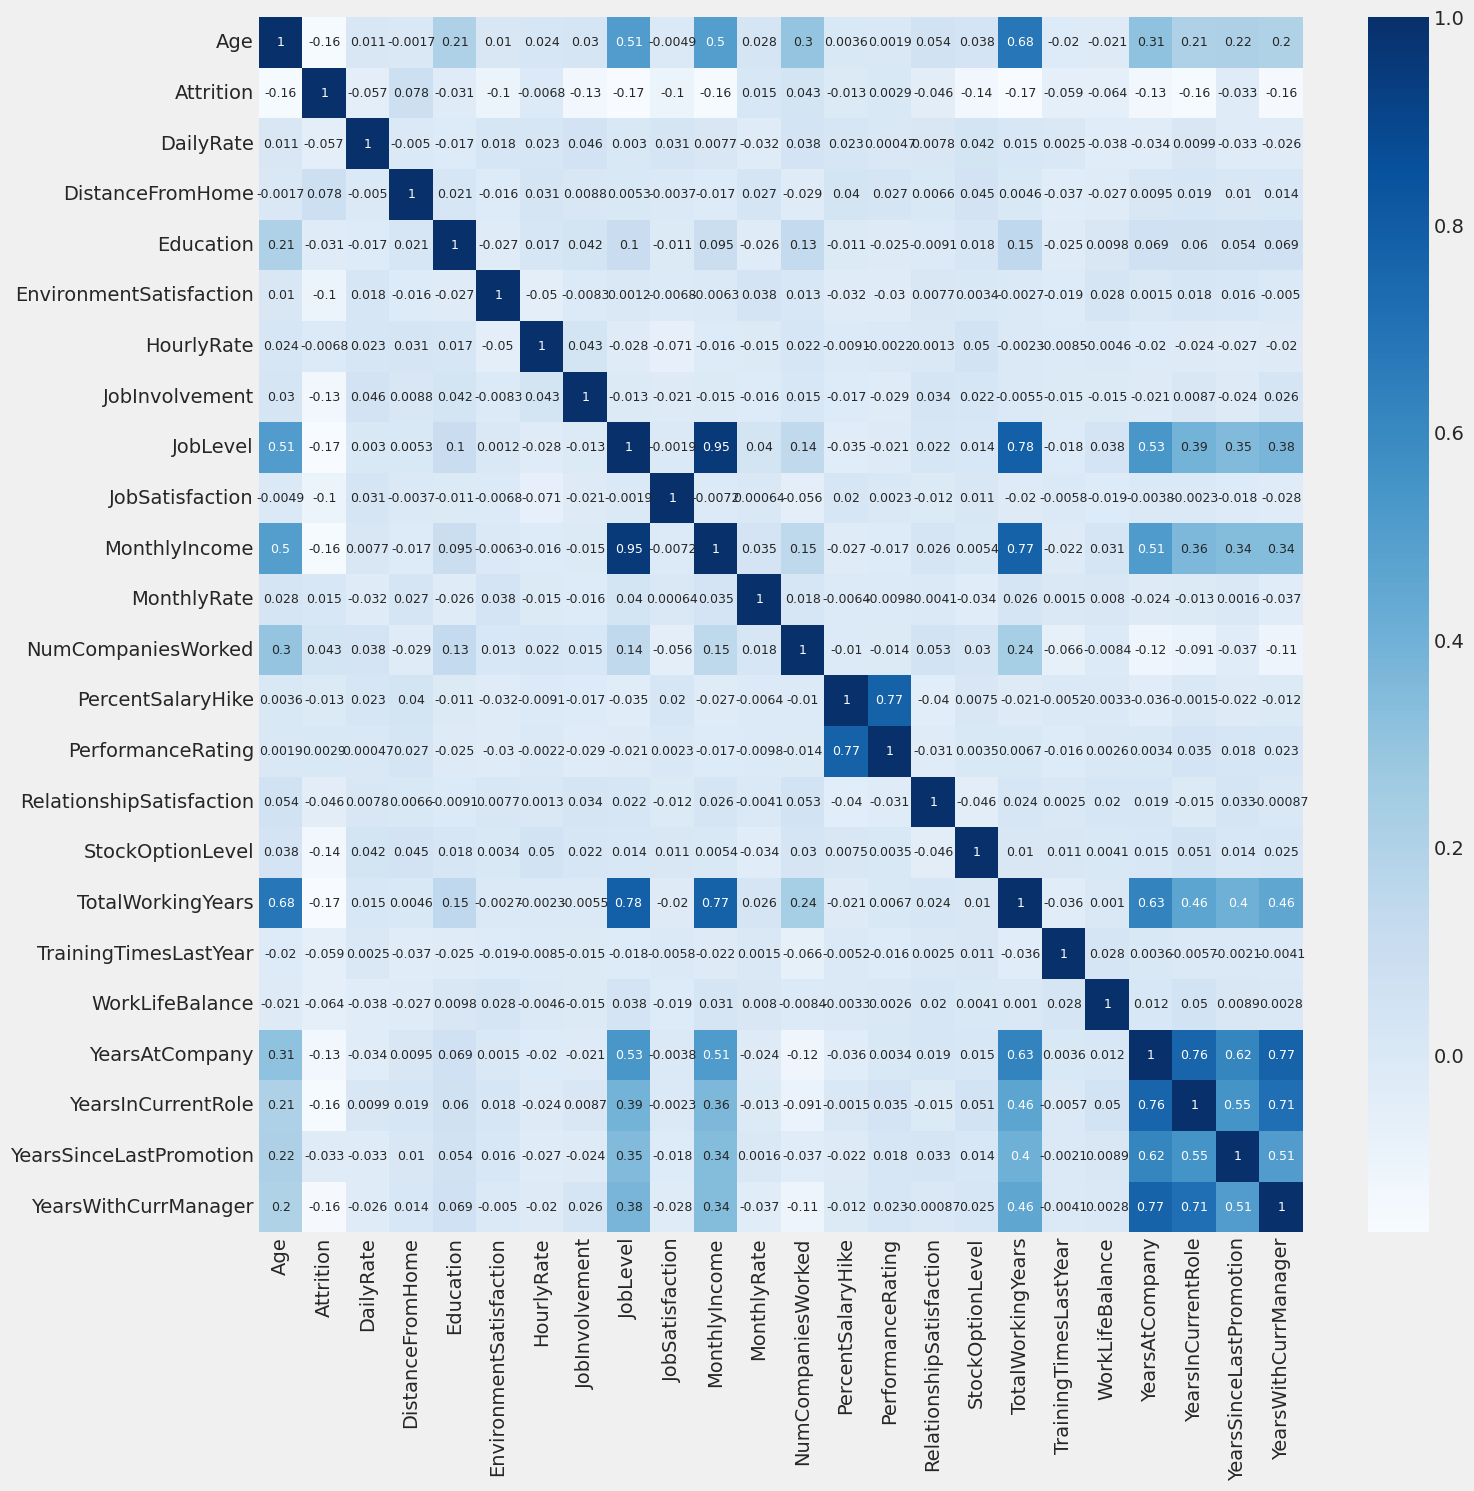

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(numeric_df.corr(), annot=True, cmap="Blues", annot_kws={"size":9})
plt.show()


In [ ]:
df.drop('Attrition', axis=1).corrwith(df.Attrition).hvplot.barh()

ValueError: could not convert string to float: 'Travel_Rarely'

###  **Analysis of correlation results**
- Monthly income is highly correlated with Job level.
- Job level is highly correlated with total working hours.
- Monthly income is highly correlated with total working hours.
- Age is also positively correlated with the Total working hours.
- Marital status and stock option level are negatively correlated

## **Step 5 | Data Preprocessing**

### **Step 5.1 | Dummy Variables**

In [ ]:
# Transform categorical data into dummies
dummy_col = [column for column in df.drop('Attrition', axis=1).columns if df[column].nunique() < 20]
data = pd.get_dummies(df, columns=dummy_col, drop_first=True, dtype='uint8')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Columns: 136 entries, Age to YearsWithCurrManager_17
dtypes: int64(9), uint8(127)
memory usage: 285.8 KB


In [ ]:
print(data.shape)

# Remove duplicate Features
data = data.T.drop_duplicates()
data = data.T

# Remove Duplicate Rows
data.drop_duplicates(inplace=True)

print(data.shape)

(1470, 136)
(1470, 136)


In [ ]:
data.shape

(1470, 136)

<Axes: >

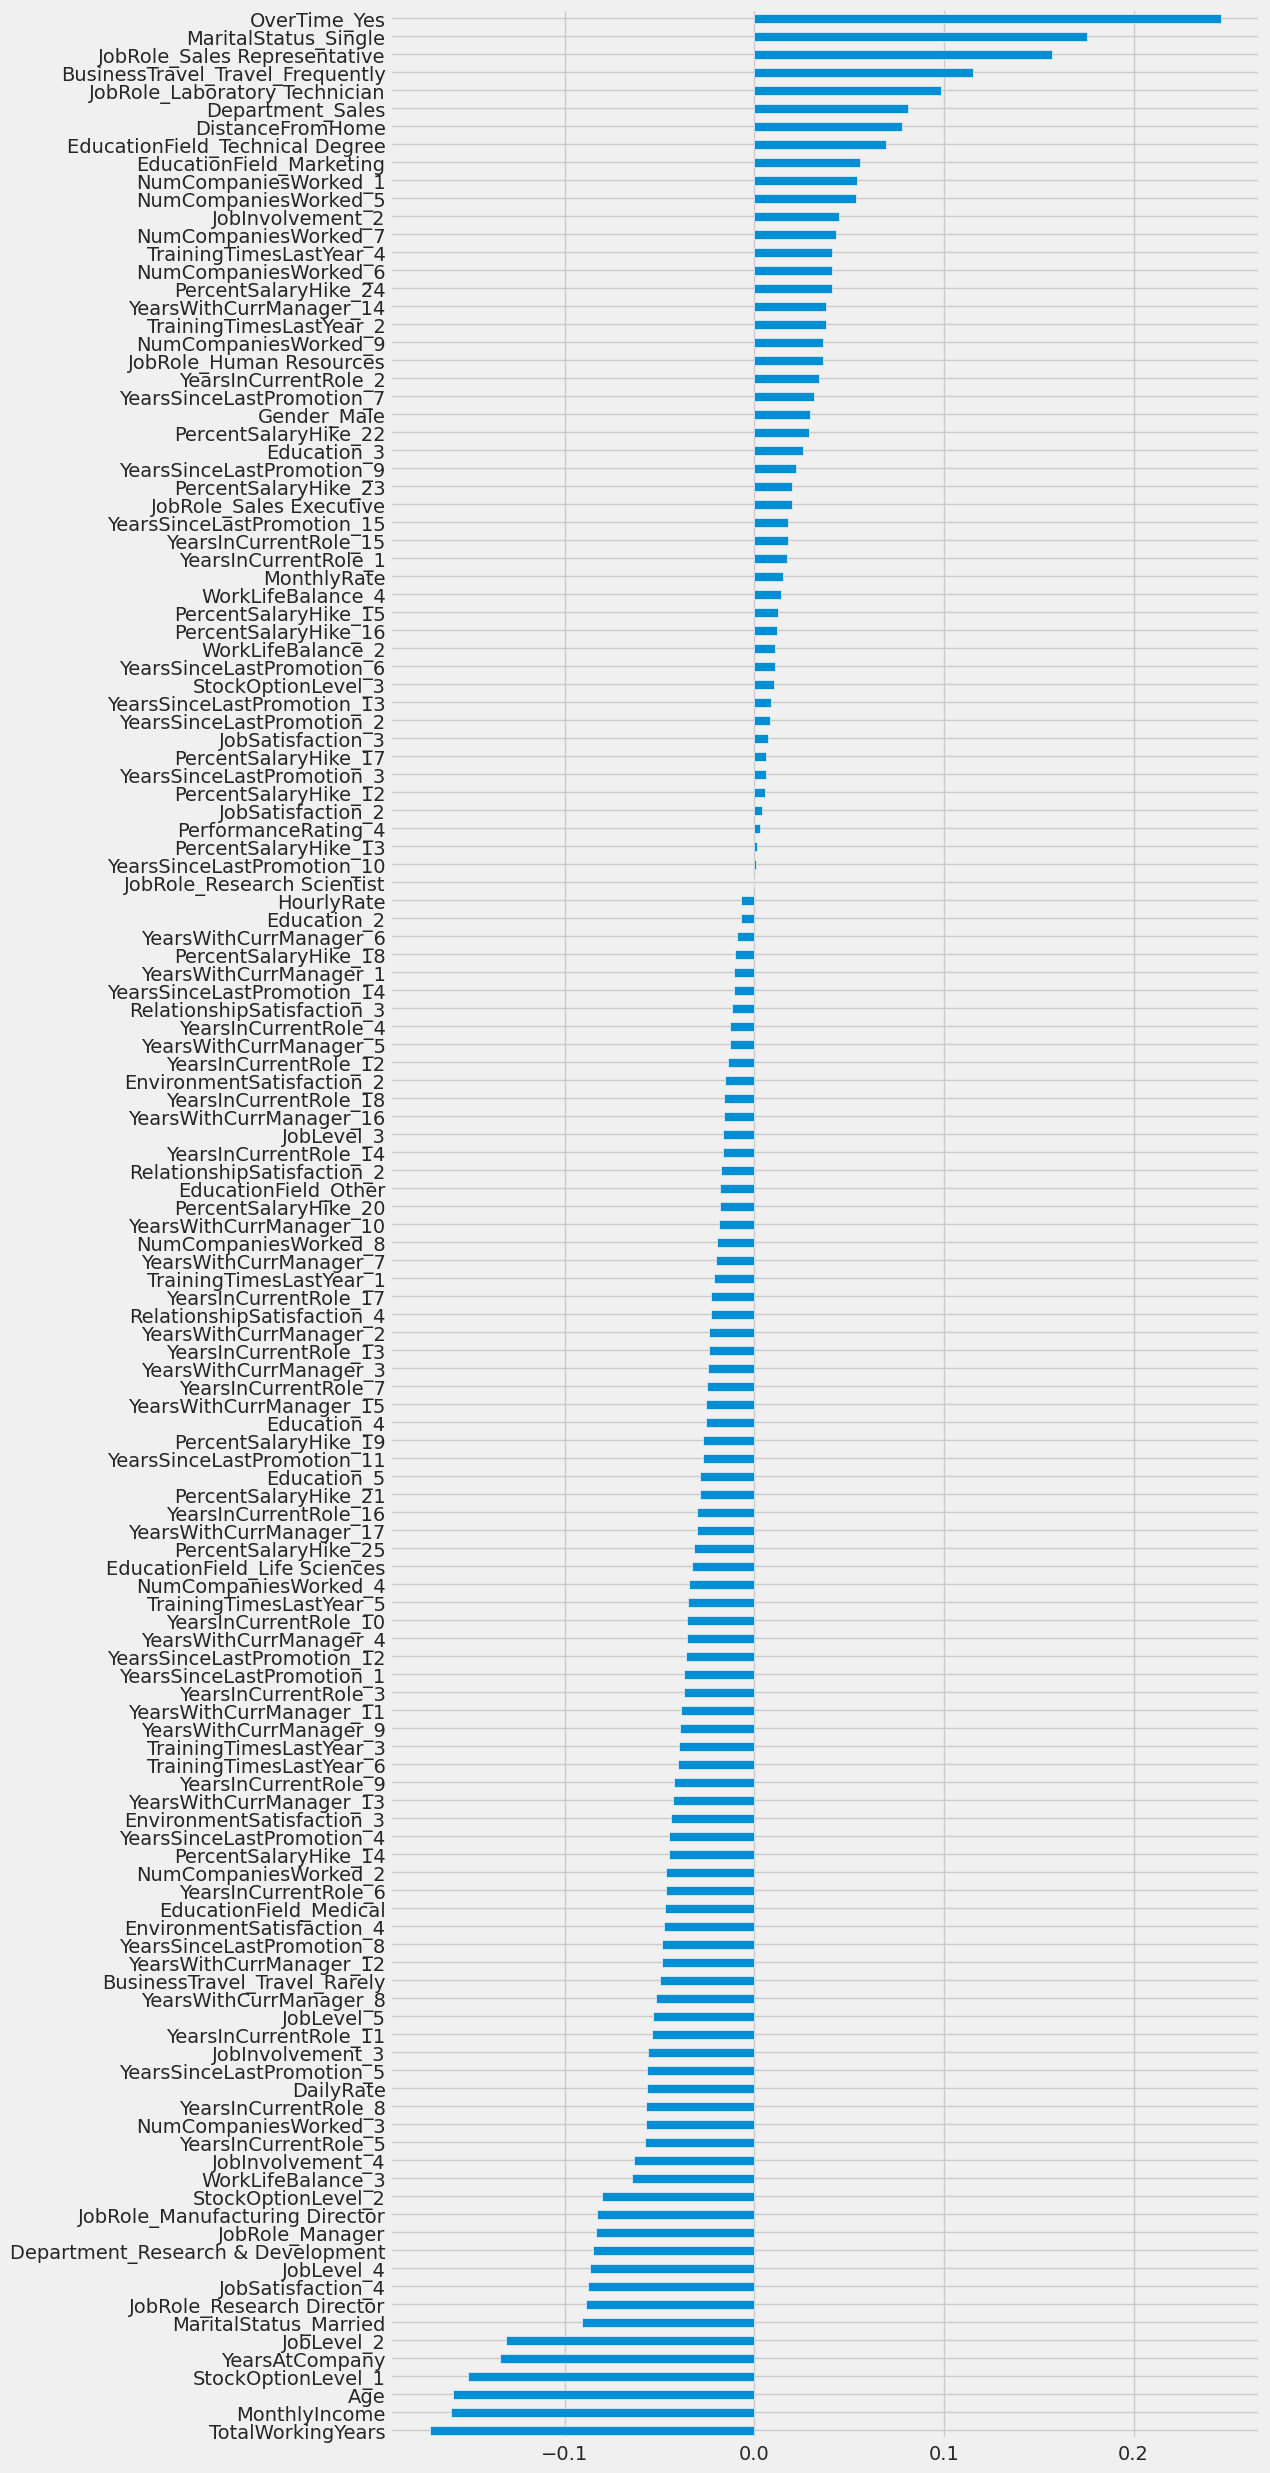

In [ ]:
data.drop('Attrition', axis=1).corrwith(data.Attrition).sort_values().plot(kind='barh', figsize=(10, 30))

In [ ]:
feature_correlation = data.drop('Attrition', axis=1).corrwith(data.Attrition).sort_values()
model_col = feature_correlation[np.abs(feature_correlation) > 0.02].index
len(model_col)

92

### **Step 5.2 | Outlier Treatment**

In [ ]:
import numpy as np
from scipy.stats import zscore

# Define a threshold for Z-score
zscore_threshold = 3

# Identify numerical columns for outlier treatment
# You might want to exclude your target variable 'Attrition'
numerical_cols_for_outliers = data.select_dtypes(include=np.number).columns.tolist()
if 'Attrition' in numerical_cols_for_outliers:
    numerical_cols_for_outliers.remove('Attrition')

# Apply Z-score to identify outliers
outlier_mask = np.abs(zscore(data[numerical_cols_for_outliers])) > zscore_threshold

# Count the number of outliers in each column
outlier_counts = outlier_mask.sum()
print("Number of outliers per numerical column (based on Z-score > 3):")
print(outlier_counts[outlier_counts > 0])

# Option 1: Remove rows with outliers
# This can lead to significant data loss if outliers are frequent
# data_no_outliers = data[~outlier_mask.any(axis=1)].copy()
# print(f"Shape after removing rows with outliers: {data_no_outliers.shape}")

# Option 2: Cap outliers (replace values beyond the threshold)
# This is often preferred to avoid data loss
data_capped = data.copy()
for col in numerical_cols_for_outliers:
    # Calculate the upper and lower bounds for capping
    upper_limit = data[col].mean() + zscore_threshold * data[col].std()
    lower_limit = data[col].mean() - zscore_threshold * data[col].std()

    # Cap the values
    data_capped[col] = np.where(data_capped[col] > upper_limit, upper_limit, data_capped[col])
    data_capped[col] = np.where(data_capped[col] < lower_limit, lower_limit, data_capped[col])

print("\nData after capping outliers:")
print(data_capped.describe().T)

# Use data_capped for subsequent steps
# If you chose to remove rows, use data_no_outliers instead
# For this example, we will use data_capped
data = data_capped

Number of outliers per numerical column (based on Z-score > 3):
[4444]

Data after capping outliers:
                          count   mean    std    min    25%    50%     75%  \
Age                     1470.00  36.92   9.14  18.00  30.00  36.00   43.00   
Attrition               1470.00   0.16   0.37   0.00   0.00   0.00    0.00   
DailyRate               1470.00 802.49 403.51 102.00 465.00 802.00 1157.00   
DistanceFromHome        1470.00   9.19   8.11   1.00   2.00   7.00   14.00   
HourlyRate              1470.00  65.89  20.33  30.00  48.00  66.00   83.75   
...                         ...    ...    ...    ...    ...    ...     ...   
YearsWithCurrManager_13 1470.00   0.00   0.03   0.00   0.00   0.00    0.00   
YearsWithCurrManager_14 1470.00   0.00   0.01   0.00   0.00   0.00    0.00   
YearsWithCurrManager_15 1470.00   0.00   0.01   0.00   0.00   0.00    0.00   
YearsWithCurrManager_16 1470.00   0.00   0.00   0.00   0.00   0.00    0.00   
YearsWithCurrManager_17 1470.00   0.00   

### **Step 5.3 | Categorical Features Encoding (One Hot Encoding)**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Xác định các cột phân loại
categorical_cols = [col for col in df.columns if df[col].dtype == 'object' and col != 'Attrition']

# Khởi tạo OneHotEncoder
import sklearn
if int(sklearn.__version__.split(".")[1]) >= 2:
    ohe = OneHotEncoder(drop='first', sparse_output=False)
else:
    ohe = OneHotEncoder(drop='first', sparse=False)

# Fit và transform dữ liệu
encoded_features = ohe.fit_transform(df[categorical_cols])

# Tạo DataFrame từ các biến đã mã hóa
encoded_df = pd.DataFrame(encoded_features, columns=ohe.get_feature_names_out(categorical_cols), index=df.index)

# Kết hợp với các biến số
df_encoded = pd.concat([df.drop(categorical_cols, axis=1), encoded_df], axis=1)

df_encoded.head()

Age  Attrition  DailyRate  DistanceFromHome  Education  \
0   41          1       1102                 1          2   
1   49          0        279                 8          1   
2   37          1       1373                 2          2   
3   33          0       1392                 3          4   
4   27          0        591                 2          1   

   EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
0                        2          94               3         2   
1                        3          61               2         2   
2                        4          92               2         1   
3                        4          56               3         1   
4                        1          40               3         1   

   JobSatisfaction  MonthlyIncome  MonthlyRate  NumCompaniesWorked  \
0                4           5993        19479                   8   
1                2           5130        24907                   1   
2                3           2090         2396                   6   
3                3           2909        23159                   1   
4                2           3468        16632                   9   

   PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0                 11                  3                         1   
1                 23                  4                         4   
2                 15                  3                         2   
3                 11                  3                         3   
4                 12                  3                         4   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  \
0                        0                     5   
1                        1                     7   
2                        0                     0   
3                        3                     0   
4                        2                     2   

   BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
0                              0.00                          1.00   
1                              1.00                          0.00   
2                              0.00                          1.00   
3                              1.00                          0.00   
4                              0.00                          1.00   

   Department_Research & Development  Department_Sales  \
0                               0.00              1.00   
1                               1.00              0.00   
2                               1.00              0.00   
3                               1.00              0.00   
4                               1.00              0.00   

   EducationField_Life Sciences  EducationField_Marketing  \
0                          1.00                      0.00   
1                          1.00                      0.00   
2                          0.00                      0.00   
3                          1.00                      0.00   
4                          0.00                      0.00   

   EducationField_Medical  EducationField_Other  \
0                    0.00                  0.00   
1                    0.00                  0.00   
2                    0.00                  1.00   
3  

## **Step 6 | Applying machine learning algorithms**

In [ ]:
pip install imbalanced-learn

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

X = data.drop('Attrition', axis=1)
y = data['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def show_confusion_matrix(model, X_test, y_test, title="Confusion Matrix"):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Attrition", "Attrition"])
    disp.plot(cmap="Blues", values_format="d")
    plt.title(title)
    plt.show()


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report,
    confusion_matrix, RocCurveDisplay
)

In [ ]:
results = []


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_model_both_sets(name, model, X_train, X_test, y_train, y_test, results_list):
    for dataset_name, X, y in [("Train", X_train, y_train), ("Test", X_test, y_test)]:
        y_pred = model.predict(X)
        y_proba = model.predict_proba(X)[:, 1] if hasattr(model, "predict_proba") else None

        print(f"\n{name} - {dataset_name} Set Classification Report:")
        print(classification_report(y, y_pred))

        results_list.append({
            "Model": name,
            "Dataset": dataset_name,
            "Accuracy": accuracy_score(y, y_pred),
            "Precision": precision_score(y, y_pred),
            "Recall": recall_score(y, y_pred),
            "F1 Score": f1_score(y, y_pred),
            "ROC AUC": roc_auc_score(y, y_proba) if y_proba is not None else "N/A"
        })


## ✔️ Logistic Regression

Logistic Regression:


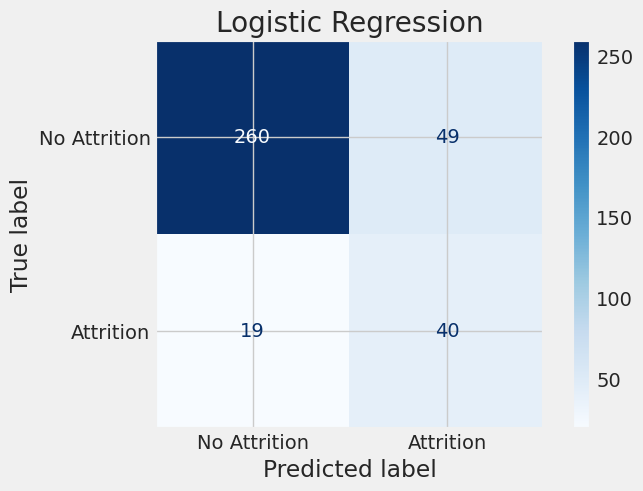

              precision    recall  f1-score   support

           0       0.93      0.84      0.88       309
           1       0.45      0.68      0.54        59

    accuracy                           0.82       368
   macro avg       0.69      0.76      0.71       368
weighted avg       0.85      0.82      0.83       368

Best Params: {'clf__C': 0.1, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs'}

Logistic Regression - Train Set Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.85      0.90       924
           1       0.51      0.84      0.64       178

    accuracy                           0.85      1102
   macro avg       0.74      0.84      0.77      1102
weighted avg       0.89      0.85      0.86      1102


Logistic Regression - Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.84      0.88       309
           1       0.45      0.68      0.54        

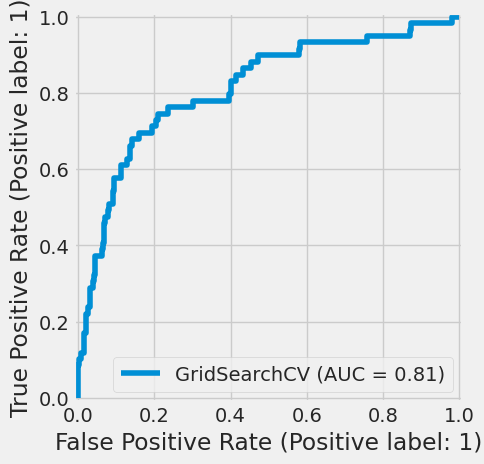

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=1000))
])

lr_params = {
    'clf__C': [0.01, 0.1, 1, 10],
    'clf__penalty': ['l2'],
    'clf__solver': ['lbfgs']
}

lr_grid = GridSearchCV(lr_pipeline, lr_params, cv=5, scoring='f1', n_jobs=-1)
lr_grid.fit(X_train, y_train)
y_pred = lr_grid.predict(X_test)

print("Logistic Regression:")
show_confusion_matrix(lr_grid.best_estimator_, X_test, y_test, "Logistic Regression")
print(classification_report(y_test, y_pred))
print("Best Params:", lr_grid.best_params_)
RocCurveDisplay.from_estimator(lr_grid, X_test, y_test)
evaluate_model_both_sets("Logistic Regression", lr_grid.best_estimator_, X_train, X_test, y_train, y_test, results)


<Axes: >

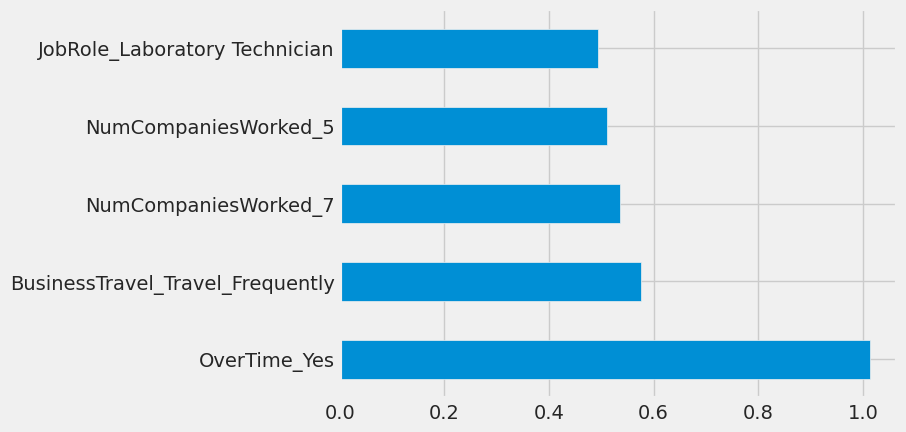

In [ ]:
# LR's Important features
importances = lr_grid.best_estimator_.named_steps['clf'].coef_[0]
feat_imp = pd.Series(importances, index=X_train.columns)
feat_imp.nlargest(5).plot(kind='barh')

## ✔️ Random Forest Classifier

Random Forest:


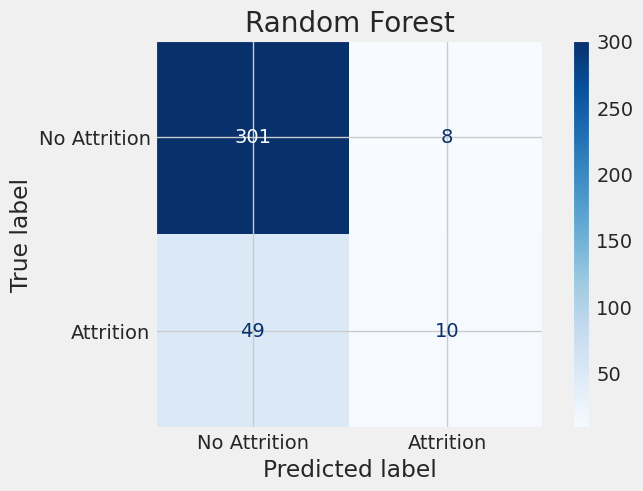

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       309
           1       0.56      0.17      0.26        59

    accuracy                           0.85       368
   macro avg       0.71      0.57      0.59       368
weighted avg       0.81      0.85      0.81       368

Best Params: {'clf__max_depth': 5, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}

Random Forest - Train Set Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       924
           1       0.90      0.48      0.62       178

    accuracy                           0.91      1102
   macro avg       0.91      0.73      0.79      1102
weighted avg       0.91      0.91      0.90      1102


Random Forest - Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       309
           1       0.56      0.17      0.26     

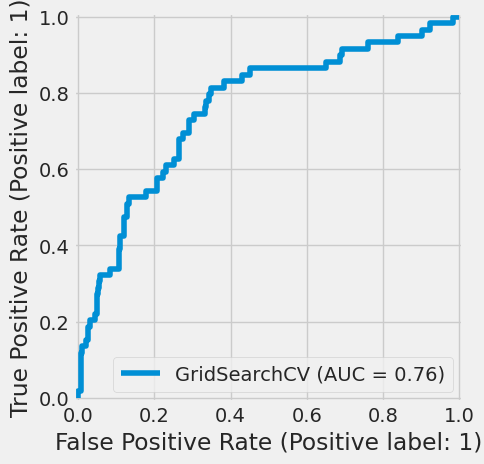

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('clf', RandomForestClassifier(random_state=42))
])

rf_params = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [5, 10, None],
    'clf__min_samples_split': [2, 5],
}

rf_grid = GridSearchCV(rf_pipeline, rf_params, cv=5, scoring='f1', n_jobs=-1)
rf_grid.fit(X_train, y_train)
y_pred = rf_grid.predict(X_test)

print("Random Forest:")
show_confusion_matrix(rf_grid.best_estimator_, X_test, y_test, "Random Forest")
print(classification_report(y_test, y_pred))
print("Best Params:", rf_grid.best_params_)
RocCurveDisplay.from_estimator(rf_grid, X_test, y_test)
evaluate_model_both_sets("Random Forest", rf_grid.best_estimator_, X_train, X_test, y_train, y_test, results)

<Axes: >

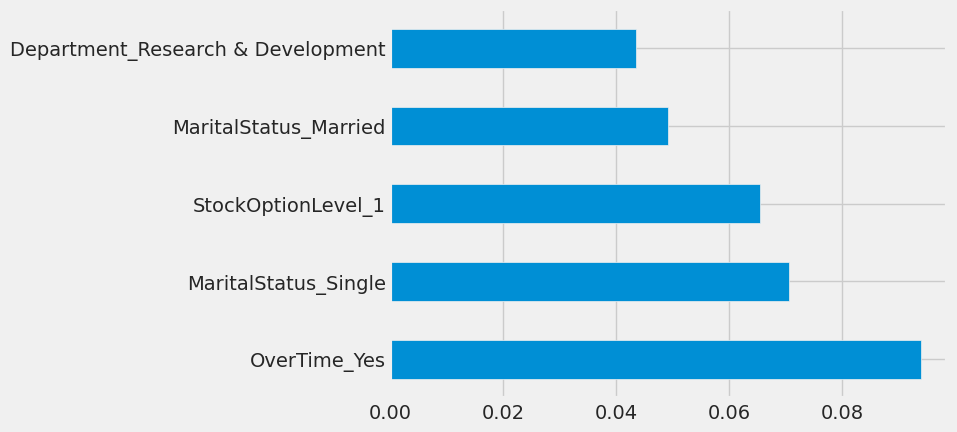

In [ ]:
# RF's Important features
importances = rf_grid.best_estimator_.named_steps['clf'].feature_importances_
feat_imp = pd.Series(importances, index=X_train.columns)
feat_imp.nlargest(5).plot(kind='barh')

## ✔️ Support Vector Machine

SVM:


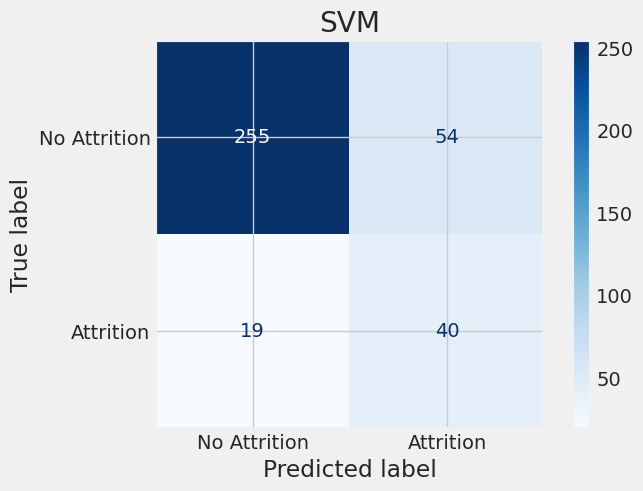

              precision    recall  f1-score   support

           0       0.93      0.83      0.87       309
           1       0.43      0.68      0.52        59

    accuracy                           0.80       368
   macro avg       0.68      0.75      0.70       368
weighted avg       0.85      0.80      0.82       368

Best Params: {'clf__C': 0.1, 'clf__gamma': 'scale', 'clf__kernel': 'linear'}

SVM - Train Set Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.85      0.91       924
           1       0.54      0.89      0.68       178

    accuracy                           0.86      1102
   macro avg       0.76      0.87      0.79      1102
weighted avg       0.91      0.86      0.87      1102


SVM - Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.83      0.87       309
           1       0.43      0.68      0.52        59

    accuracy              

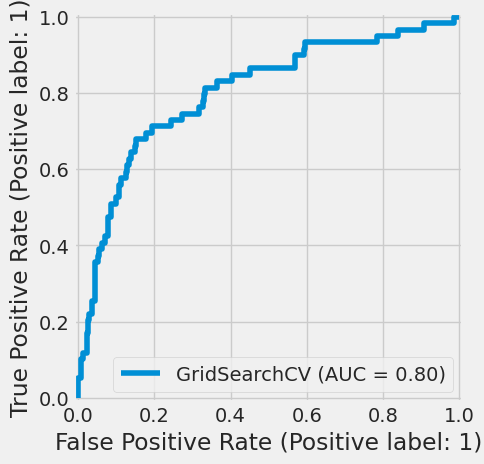

In [ ]:
from sklearn.svm import SVC

svm_pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('clf', SVC(probability=True))
])

svm_params = {
    'clf__C': [0.1, 1, 10],
    'clf__kernel': ['linear', 'rbf'],
    'clf__gamma': ['scale', 'auto']
}

svm_grid = GridSearchCV(svm_pipeline, svm_params, cv=5, scoring='f1', n_jobs=-1)
svm_grid.fit(X_train, y_train)
y_pred = svm_grid.predict(X_test)

print("SVM:")
show_confusion_matrix(svm_grid.best_estimator_, X_test, y_test, "SVM")
print(classification_report(y_test, y_pred))
print("Best Params:", svm_grid.best_params_)
RocCurveDisplay.from_estimator(svm_grid, X_test, y_test)
evaluate_model_both_sets("SVM", svm_grid.best_estimator_, X_train, X_test, y_train, y_test, results)


## ✔️ XGBoost Classifier

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:15:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost:


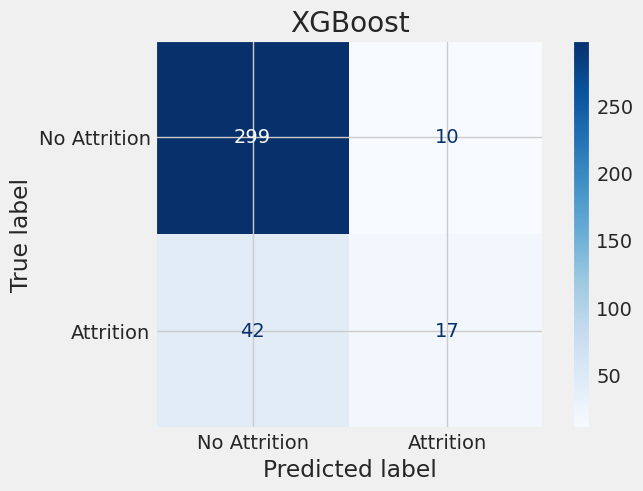

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       309
           1       0.63      0.29      0.40        59

    accuracy                           0.86       368
   macro avg       0.75      0.63      0.66       368
weighted avg       0.84      0.86      0.84       368

Best Params: {'clf__learning_rate': 0.2, 'clf__max_depth': 3, 'clf__n_estimators': 200}

XGBoost - Train Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       924
           1       1.00      0.99      0.99       178

    accuracy                           1.00      1102
   macro avg       1.00      0.99      1.00      1102
weighted avg       1.00      1.00      1.00      1102


XGBoost - Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       309
           1       0.63      0.29      0.40        59

    acc

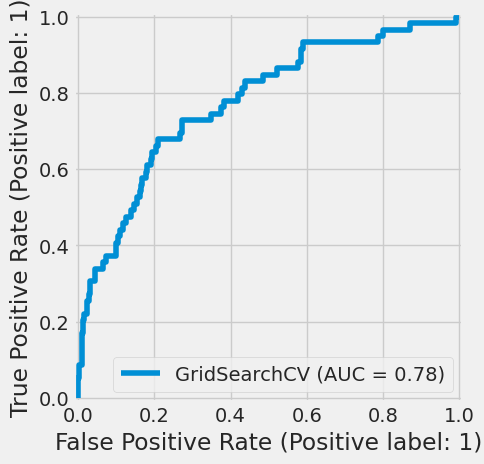

In [ ]:
from xgboost import XGBClassifier

xgb_pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('clf', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])

xgb_params = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [3, 5, 7],
    'clf__learning_rate': [0.01, 0.1, 0.2]
}

xgb_grid = GridSearchCV(xgb_pipeline, xgb_params, cv=5, scoring='f1', n_jobs=-1)
xgb_grid.fit(X_train, y_train)
y_pred = xgb_grid.predict(X_test)

print("XGBoost:")
show_confusion_matrix(xgb_grid.best_estimator_, X_test, y_test, "XGBoost")
print(classification_report(y_test, y_pred))
print("Best Params:", xgb_grid.best_params_)
RocCurveDisplay.from_estimator(xgb_grid, X_test, y_test)
evaluate_model_both_sets("XGBoost", xgb_grid.best_estimator_, X_train, X_test, y_train, y_test, results)


<Axes: >

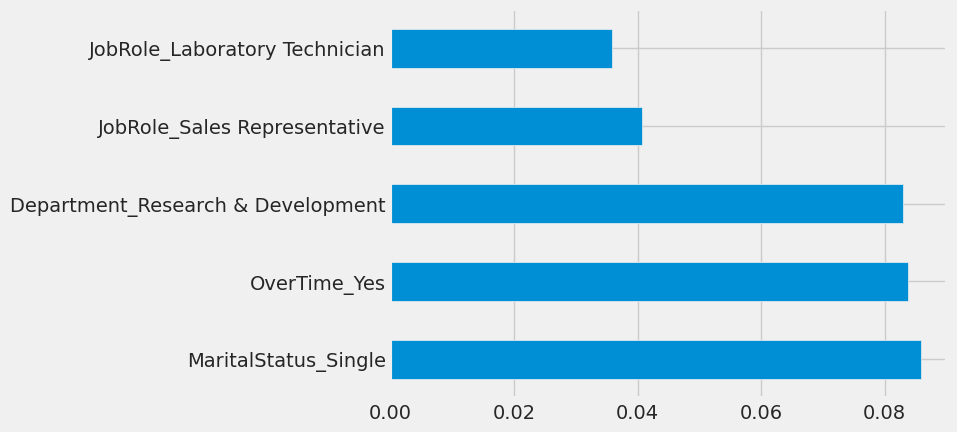

In [ ]:
# XGB's Important feature
importances = xgb_grid.best_estimator_.named_steps['clf'].feature_importances_
feat_imp = pd.Series(importances, index=X_train.columns)
feat_imp.nlargest(5).plot(kind='barh')

## ✔️ LightGBM

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 924, number of negative: 924
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002703 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10982
[LightGBM] [Info] Number of data points in the train set: 1848, number of used features: 114
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM:


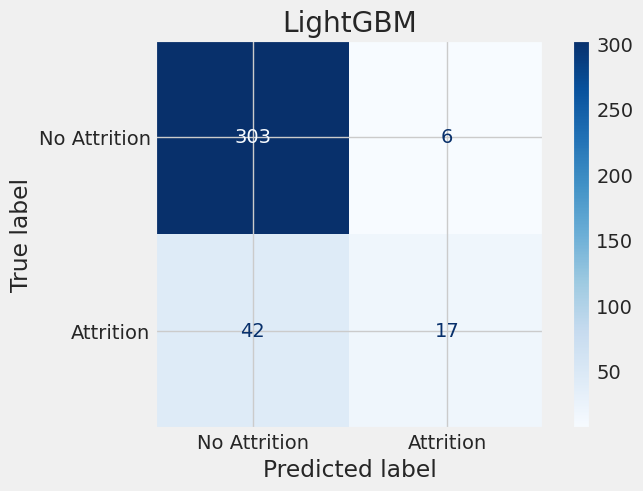

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       309
           1       0.74      0.29      0.41        59

    accuracy                           0.87       368
   macro avg       0.81      0.63      0.67       368
weighted avg       0.86      0.87      0.84       368

Best Params: {'clf__learning_rate': 0.1, 'clf__n_estimators': 100, 'clf__num_leaves': 31}

LightGBM - Train Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       924
           1       1.00      1.00      1.00       178

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102


LightGBM - Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       309
           1       0.74      0.29      0.41        59

   

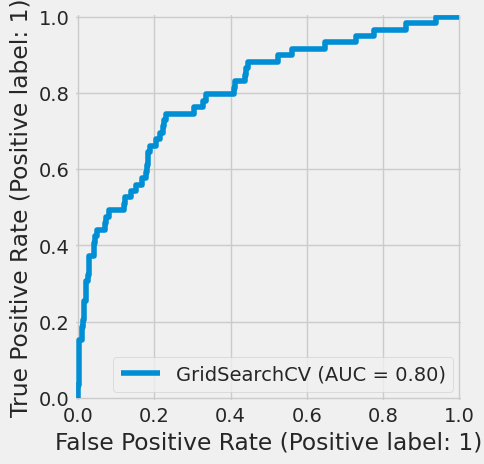

In [ ]:
from lightgbm import LGBMClassifier

lgbm_pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('clf', LGBMClassifier())
])

lgbm_params = {
    'clf__n_estimators': [100, 200],
    'clf__num_leaves': [31, 50],
    'clf__learning_rate': [0.01, 0.1]
}

lgbm_grid = GridSearchCV(lgbm_pipeline, lgbm_params, cv=5, scoring='f1', n_jobs=-1)
lgbm_grid.fit(X_train, y_train)
y_pred = lgbm_grid.predict(X_test)

print("LightGBM:")
show_confusion_matrix(lgbm_grid.best_estimator_, X_test, y_test, "LightGBM")
print(classification_report(y_test, y_pred))
print("Best Params:", lgbm_grid.best_params_)
RocCurveDisplay.from_estimator(lgbm_grid, X_test, y_test)
evaluate_model_both_sets("LightGBM", lgbm_grid.best_estimator_, X_train, X_test, y_train, y_test, results)

<Axes: >

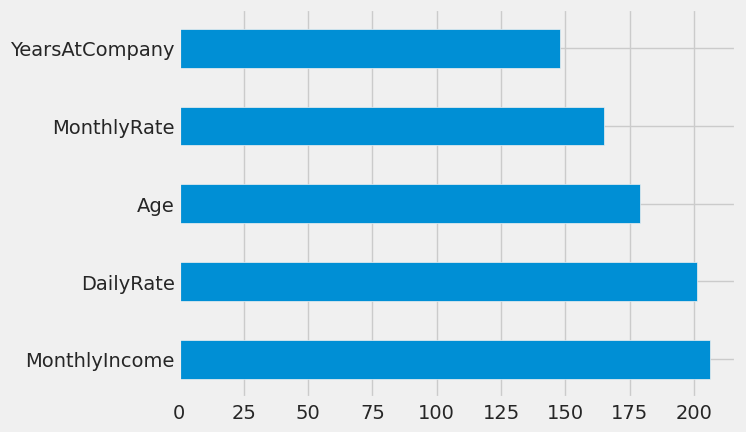

In [ ]:
# LGBM's Important feature
importances = lgbm_grid.best_estimator_.named_steps['clf'].feature_importances_
feat_imp = pd.Series(importances, index=X_train.columns)
feat_imp.nlargest(5).plot(kind='barh')

# **Comparing Models Performance**


--- Model Performance on Test Set ---
| Model               |   Accuracy |   Precision |   Recall |   F1 Score |   ROC AUC |
|:--------------------|-----------:|------------:|---------:|-----------:|----------:|
| Logistic Regression |   0.815217 |    0.449438 | 0.677966 |   0.540541 |  0.812298 |
| Random Forest       |   0.845109 |    0.555556 | 0.169492 |   0.25974  |  0.759311 |
| SVM                 |   0.80163  |    0.425532 | 0.677966 |   0.522876 |  0.801986 |
| XGBoost             |   0.858696 |    0.62963  | 0.288136 |   0.395349 |  0.776041 |
| LightGBM            |   0.869565 |    0.73913  | 0.288136 |   0.414634 |  0.804399 |


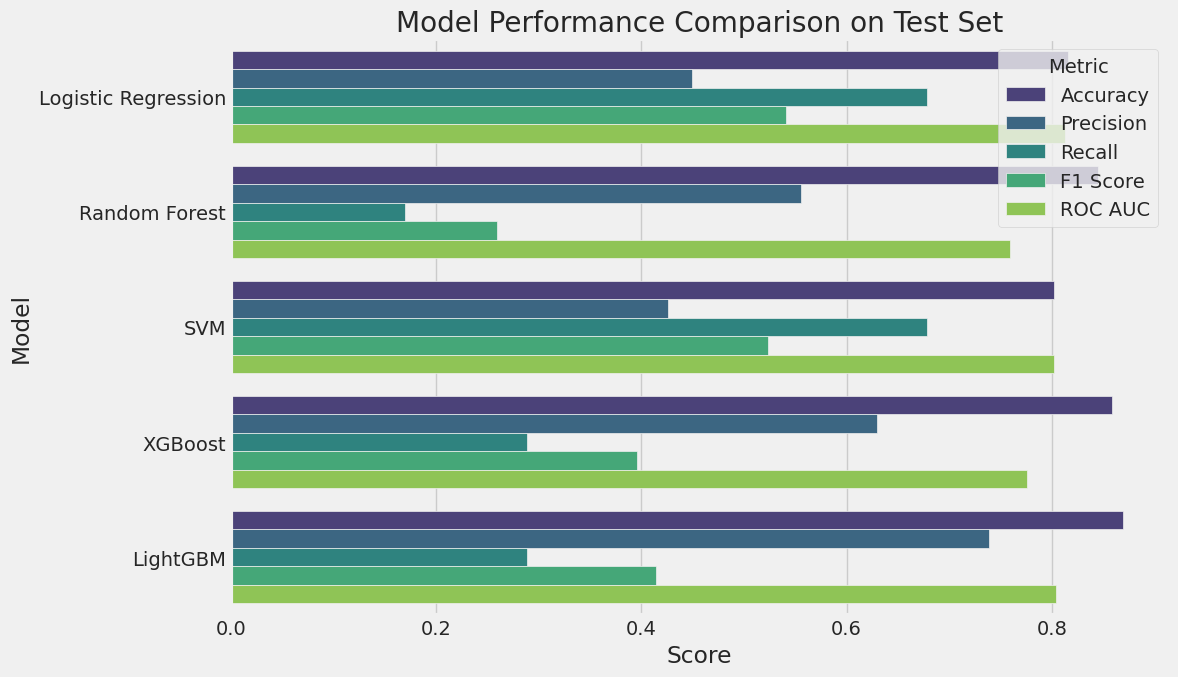

In [ ]:
# Comparing Models Performance on the Test Set
results_df = pd.DataFrame(results)
test_results = results_df[results_df['Dataset'] == 'Test'].drop(columns=['Dataset'])

print("\n--- Model Performance on Test Set ---")
print(test_results.to_markdown(index=False))

# Visualize Test Performance
test_results_melted = test_results.melt(
    id_vars='Model',
    var_name='Metric',
    value_name='Score'
)

# Ensure ROC AUC is numeric before plotting
test_results_melted['Score'] = pd.to_numeric(test_results_melted['Score'], errors='coerce')
test_results_melted = test_results_melted.dropna(subset=['Score'])


plt.figure(figsize=(12, 7))
sns.barplot(data=test_results_melted, x='Score', y='Model', hue='Metric', palette='viridis')
plt.title('Model Performance Comparison on Test Set')
plt.xlabel('Score')
plt.ylabel('Model')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()


In [ ]:
# Use model on the entire dataset (excluding target)
X_all = data.drop("Attrition", axis=1)
y_all = data["Attrition"]

# Get predicted labels and probabilities
best_model = lr_grid.best_estimator_
pred_labels = best_model.predict(X_all)
pred_probs = best_model.predict_proba(X_all)[:, 1]  # Probability of Attrition (class = 1)

# Combine predictions with original data
output_df = X_all.copy()
output_df["Predicted_Attrition"] = pred_labels
output_df["Attrition_Probability"] = pred_probs
output_df["Actual_Attrition"] = y_all.values


In [ ]:
# Export to CSV
output_df.to_csv("attrition_predictions.csv", index=False)
print("File saved as attrition_predictions.csv")


File saved as attrition_predictions.csv


In [ ]:
output_df.head()


Age  DailyRate  DistanceFromHome  HourlyRate  MonthlyIncome  MonthlyRate  \
0 41.00    1102.00              1.00       94.00        5993.00     19479.00   
1 49.00     279.00              8.00       61.00        5130.00     24907.00   
2 37.00    1373.00              2.00       92.00        2090.00      2396.00   
3 33.00    1392.00              3.00       56.00        2909.00     23159.00   
4 27.00     591.00              2.00       40.00        3468.00     16632.00   

   TotalWorkingYears  YearsAtCompany  BusinessTravel_Travel_Frequently  \
0               8.00            6.00                              0.00   
1              10.00           10.00                              1.00   
2               7.00            0.00                              0.00   
3               8.00            8.00                              1.00   
4               6.00            2.00                              0.00   

   BusinessTravel_Travel_Rarely  Department_Research & Development  \
0                          1.00                               0.00   
1                          0.00                               1.00   
2                          1.00                               1.00   
3                          0.00                               1.00   
4                          1.00                               1.00   

   Department_Sales  Education_2  Education_3  Education_4  Education_5  \
0              1.00         1.00         0.00         0.00         0.00   
1              0.00         0.00         0.00         0.00         0.00   
2              0.00         1.00         0.00         0.00         0.00   
3              0.00         0.00         0.00         1.00         0.00   
4              0.00         0.00         0.00         0.00         0.00   

   EducationField_Life Sciences  EducationField_Marketing  \
0                          1.00                      0.00   
1                          1.00                      0.00   
2                          0.00                      0.00   
3                          1.00                      0.00   
4                          0.00                      0.00   

   EducationField_Medical  EducationField_Other  \
0                    0.00                  0.00   
1                    0.00                  0.00   
2                    0.00                  0.74   
3                    0.00                  0.00   
4                    1.00                  0.00   

   EducationField_Technical Degree  EnvironmentSatisfaction_2  \
0                             0.00                       1.00   
1                             0.00                       0.00   
2                             0.00                       0.00   
3                             0.00                       0.00   
4                             0.00                       0.00   

   EnvironmentSatisfaction_3  EnvironmentSatisfaction_4  Gender_Male  \
0                       0.00                       0.00         0.00   
1                       1.00                       0.00         1.00   
2                       0.00                       1.00         1.00   
3                       0.00                       1.00         0.00   
4                       0.00                       0.00         1.00   

   JobInvolvement_2  JobInvolvement_3  JobInvolvement_4  JobLevel_2  \
0              0.00              1.00              0.00        1.00   
1              1.00              0.00              0.00        1.00   
2              1.00              0.00              0.00        0.00   
3              0.00              1.00              0.00        0.00   
4              0.00              1.00              0.00        0.00   

   JobLevel_3  JobLevel_4  JobLevel_5  JobRole_Human Resources  \
0        0.00        0.00        0.00                     0.00   
1        0.00        0.00        0.00                     0.00   
2        0.00        0.00        0.00                     0.00   
3        0.00    